In [2]:
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})
import math
import argparse
import numpy as np
import matplotlib.pyplot as plt
from wim_dateTime import createListDateTime
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
import argparse
import subprocess
import warnings
import netCDF4 as nc
import numpy.ma as ma
import os
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib as mpl
import cmoocean as cmo
from matplotlib import cm
from matplotlib.gridspec import GridSpec


In [3]:
def defineCBAnom(variable, var):

    #cmap=cmo.balance()
    cmap=plt.cm.RdBu
    
    print(np.amax(variable))
    print(np.amin(variable))
#     v_lim = max([abs(variable.max()),abs(variable.min())])
    # print(variable.max())
#     if var == 'aice':
#         #cmap=cmo.crop(cmap,vmax=0.012,vmin=-0.012,pivot=0, N=13, dmax=0.012)
# #         bounds = [-0.12,-0.1,-0.08,-0.06,-0.04,-0.02, 0.02,0.04,0.06, 0.08,0.1,0.12]
# #         bounds = [x*0.2 for x in bounds]
#     norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#     norm = mpl.colors.BoundaryNorm(cmap.N)
    norm=mpl.colors.CenteredNorm(cmap.N)
#     elif var == 'hi':
#         #cmap=cmo.crop(cmap,vmax=variable.max(),vmin=variable.min(),pivot=0)
#         bounds = [-0.12,-0.1,-0.08,-0.06,-0.04,-0.02, 0.02,0.04,0.06, 0.08,0.1,0.12]
#         bounds = [x*0.5 for x in bounds]
#         norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#     elif var == 'fsdrad':
#         bounds = [-600,-500,-400,-300,-200,-100,-50,50,100,200,300,400,500,600]
#         norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#     elif var == 'hs':
#         bounds = [-600,-500,-400,-300,-200,-100,-50,50,100,200,300,400,500,600]
#         bounds = [x*0.0001 for x in bounds]
#         norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
#     else :
#         cmap=cmo.crop(cmap,vmax=variable.max(),vmin=variable.min(),pivot=0)
#     #v_lim = max([abs(variable.max()),abs(variable.min())])

# if var == 'aice':
# elif var == 'hi':
# elif var == 'fsdrad':
# elif var == 'dafsd_newi' or var == 'dafsd_latg' or var == 'dafsd_latm' or var == 'dafsd_weld' or var == 'dafsd_wave':
# elif var == 'hs' or var == 'lm':
# elif var == 'strwv' or var == 'strair':
# elif var == 'sst'
    return cmap, norm
#     return cmap, norm


def defineCB(variable, var):

    path_colormap="/aos/home/bward/wim/post-proc/cmo_colormap/"

    if var == 'aice':
        cmap=cmo.ice()
        bounds = [0, 0.05, 0.10, 0.15, 0.20, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.995, 0.996,0.997, 0.998, 0.999, 1]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    elif var == 'hi':
        # cmap=cmo.matter().reversed()
        cmap=plt.cm.Spectral.reversed()
        bounds = [0, 0.2, 0.4, 0.6, 0.8, 1.2, 1.6, 2, 2.4, 2.8, 3.2, 3.6, 4]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    elif var == 'fsdrad':
        # cmap2=cmo.curl()
        # cmap=cmo.curl_pink().reversed()
        # test=cmap.colors
        # test2=cmap2.colors
        # test3=np.concatenate((test2,test))
        # cmap=ListedColormap(test3)
        cmap=cmo.matter()
        bounds = [0, 10, 30, 60, 100, 180, 280, 424, 600, 860, 1160, 1500, 2000]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    elif var == 'dafsd_newi' or var == 'dafsd_latg' or var == 'dafsd_weld' :
        cmap=plt.cm.YlGnBu
        bounds = [0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        bounds = [x*10**-6 for x in bounds]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    elif var == 'dafsd_wave':
        cmap=plt.cm.YlOrRd
        bounds = [0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        bounds = [x*10**-6 for x in bounds]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    elif var == 'dafsd_latm':
        cmap=plt.cm.YlOrRd.reversed()
        bounds = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.15, -0.1, -0.05, 0]
        bounds = [x*10**-6 for x in bounds]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    elif var == 'hs':
        cmap=cmo.amp().reversed()
        bounds = levels=[0.01, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    elif var == 'strair' :
        cmap=cmo.speed()
        bounds = [0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        bounds = [2*x*10**-1 for x in bounds]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    elif var == 'strwv':
        cmap=cmo.speed()
        bounds = [0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        bounds = [2*x*10**-2 for x in bounds]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    elif var == 'strnorm':
        cmap=cmo.speed()
        bounds=[0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    elif var == 'lm':
        cmap=cmo.curl().reversed()
        bounds = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
    else:
        cmap=plt.cm.Blues
    
    return cmap,norm


def create_wind_projection(dataX, dataY, path_g, file_g, path_out, basem, nlon, nlat):
    '''
    Read wind from WW3 output in the WIM coupled framework. Then rotate it according to the Basemap projection
    Then copy into a new file
    Then interpolate
    '''
    #Read file uwnd and vwnd (pourrait etre remplacer par un readata).
    file_data=path_g+"/"+file_g
    name=file_g[:-3]
    file_wind=path_out+"/"+name+"_vec.nc"

   #Creer un nouveau dataset avec juste le vent  dedans.
    df = pd.DataFrame()
    dsWind=df.to_xarray()
    dsWind['vecX']=(("latitude","longitude"),dataX)
    dsWind['vecY']=(("latitude","longitude"),dataY)
    dsWind.to_netcdf(file_wind)

    # Copier la grille dans le data set.
    grid_info=path_out+"/griddes.info"
    file_grid=path_g+"/"+file_g
    os.system('/opt/cdo/bin/cdo griddes '+file_grid+">"+grid_info)
    os.system("sed -i '/gridtype  = curvilinear/,$!d' "+grid_info)
    os.system('/opt/cdo/bin/cdo setgrid,'+grid_info+" "+file_wind+" "+file_wind+"_grd>/dev/null 2>&1")
    os.system('rm -f '+file_wind)
    os.system('mv '+file_wind+"_grd "+file_wind)

    # Creer le fichier de directive pour l'interpolation sur une grille equilibre dependamment de la projection.
    lonsout, latsout=basem.makegrid(31,31)
    new_grid_info=path_out+"/remap_griddes.info"
    np.savetxt(path_out+"/lat_remap.dat", latsout, fmt='%.2f')
    np.savetxt(path_out+"/lon_remap.dat", lonsout, fmt='%.2f')

   
    os.system("echo 'gridtype     = curvilinear' > "+new_grid_info)
    os.system("echo 'gridsize     = '"+str(latsout.shape[0]*latsout.shape[1])+" >> "+new_grid_info)
    os.system("echo 'xsize     = '"+str(latsout.shape[0])+" >> "+new_grid_info)
    os.system("echo 'ysize     = '"+str(latsout.shape[1])+" >> "+new_grid_info)
    os.system("echo 'xvals     =' >> "+new_grid_info+" && cat "+path_out+"/lon_remap.dat >>"+new_grid_info)
    os.system("echo 'yvals     =' >> "+new_grid_info+" && cat "+path_out+"/lat_remap.dat >>"+new_grid_info)

    #Interpolate
    os.system('/opt/cdo/bin/cdo remapbil,'+new_grid_info+" "+file_wind+" "+file_wind+"_interp>/dev/null 2>&1")
    os.system('rm -f '+file_wind)
    os.system('mv '+file_wind+"_interp"+" "+file_wind)

    dsWind_new=xr.open_dataset(file_wind)
    #Rotate in the projection
    uwind_new=np.squeeze(np.nan_to_num(dsWind_new['vecX'].values))
    vwind_new=np.squeeze(np.nan_to_num(dsWind_new['vecY'].values))

    lon_new=np.nan_to_num(dsWind_new[['lon']]['lon'].values.squeeze())
    lat_new=np.nan_to_num(dsWind_new[['lat']]['lat'].values.squeeze())
# #    lat_new=read_data(path_a, [name+"_wnd.nc"], 'lat', 41, 41)
# #    lon_new=read_data(path_a, [name+"_wnd.nc"], 'lon', 41, 41)
    urot,vrot,xx,yy = basem.rotate_vector(uwind_new,vwind_new,lon_new,lat_new,returnxy=True)

    urot_cyc = np.zeros((urot.shape[0],urot.shape[1]+1))
    vrot_cyc = np.zeros((vrot.shape[0],vrot.shape[1]+1))
    xx_cyc = np.zeros((xx.shape[0],xx.shape[1]+1))
    yy_cyc = np.zeros((yy.shape[0],yy.shape[1]+1))
    # mask = np.zeros((urot.shape[0],urot.shape[1]+1))

    urot_cyc[:,0:-1] = urot[:,:]; urot_cyc[:,-1] = urot[:,0]
    vrot_cyc[:,0:-1] = vrot[:,:]; vrot_cyc[:,-1] = vrot[:,0]
    xx_cyc[:,0:-1] = xx[:,:]; xx_cyc[:,-1] = xx[:,0]
    yy_cyc[:,0:-1] = yy[:,:]; yy_cyc[:,-1] = yy[:,0]
    # mask[:,0:-1] = urot.mask[:,:]; mask[:,-1] = urot.mask[:,0]

    # urot_cycM=np.ma.masked_array(urot_cyc,mask=mask)
    # vrot_cycM=np.ma.masked_array(vrot_cyc,mask=mask)

    return urot_cyc,vrot_cyc,xx_cyc,yy_cyc

def get_geomCICE(path, file):
    '''
    This function reads the ni, nj, tlat, and tlon variables from a netcdf file
    '''
    fid = nc.Dataset("{}/{}".format(path, file), 'r')
    tlat = fid.variables['TLAT'][:]
    tlon = fid.variables['TLON'][:]
    ni = fid.dimensions['ni'].size
    nj = fid.dimensions['nj'].size

    return nj, ni, tlat, tlon

def get_geomWW3(path, file):
    '''
    This function reads the ni, nj, tlat, and tlon variables from a netcdf file
    '''
    fid = nc.Dataset("{}/{}".format(path, file), 'r')
    tlat = fid.variables['latitude'][:]
    tlon = fid.variables['longitude'][:]
    ni = fid.dimensions['lon'].size #ni is for lat, nj for lon
    nj = fid.dimensions['lat'].size

    return nj, ni, tlat, tlon

def readDataCICEWW3(REP_IN, file, lat, var):
    if file != "none":
        ds=xr.open_dataset(REP_IN+'/'+file)
        data=np.squeeze(np.nan_to_num(ds[var].values))
        mask=np.logical_or(lat<0, data==0)
        data=ma.masked_array(data, mask=mask)
    else:
        data=np.array([])
    return data

def readVectorCICEWW3(REP_IN, file, lat, varVec):
    if file != "none":
        ds=xr.open_dataset(REP_IN+'/'+file)
        dataX=np.squeeze(np.nan_to_num(ds[varVec[0]].values))
        dataY=np.squeeze(np.nan_to_num(ds[varVec[1]].values))
        norm=np.sqrt(dataX**2+dataY**2)
        mask=np.logical_or(norm<0, norm==0)
        dataX=ma.masked_array(dataX, mask=mask)
        dataY=ma.masked_array(dataY, mask=mask)
    else:
        dataX=np.array([])
        dataY=np.array([])
    return dataX, dataY

def readFsdVarCICE(REP_IN, file, lat, varFSD, nfsd_avg):
    if file != "none":
        ds=xr.open_dataset(REP_IN+'/'+file)
        data=np.squeeze(np.nan_to_num(ds[varFSD].values))
        # data=np.squeeze(np.average(data[nfsd_avgS:nfsd_avgE,:,:], axis=0))
        data=np.squeeze(data[nfsd_avg,:,:])
        mask=np.logical_or(lat<0, data==0)
        data=ma.masked_array(data, mask=mask)
    else:
        data=np.array([])
    return data

def readDataNonStdCICE(REP_IN, file, lat, var):
    if file != "none":
        ds=xr.open_dataset(REP_IN+'/'+file)
        # data=np.squeeze(np.average(data[nfsd_avgS:nfsd_avgE,:,:], axis=0))
        if var == "strair":
            dataX=np.squeeze(np.nan_to_num(ds['strairx'].values))
            dataY=np.squeeze(np.nan_to_num(ds['strairy'].values))
            data=np.sqrt(dataX**2+dataY**2)
        if var == "strwv":
            dataX=np.squeeze(np.nan_to_num(ds['strwvx'].values))
            dataY=np.squeeze(np.nan_to_num(ds['strwvy'].values))
            data=np.sqrt(dataX**2+dataY**2)
        if var == "strnorm":
            dataX=np.squeeze(np.nan_to_num(ds['strwvx'].values))
            dataY=np.squeeze(np.nan_to_num(ds['strwvy'].values))
            strwv=np.sqrt(dataX**2+dataY**2)
            dataX=np.squeeze(np.nan_to_num(ds['strairx'].values))
            dataY=np.squeeze(np.nan_to_num(ds['strairy'].values))
            strair=np.sqrt(dataX**2+dataY**2)
            mask_array=np.logical_or(lat<0, strair==0)
            strair=ma.masked_array(strair, mask=mask_array)
            strwv=ma.masked_array(strwv, mask=mask_array)
            data=strwv/(strair+strwv)

        mask=np.logical_or(lat<0, data==0)
        data=ma.masked_array(data, mask=mask)
    else:
        data=np.array([])
    return data


def findFilesCICEWW3(ts, pp_prod, coupled, coupledWW3, coupledCICE, timeStep, outfreqU, list_avg,i):
    datetimeW3=ts
    if pp_prod == "hourly":
        if coupled == "true":
            print("Coupled")
            datetimeCI=ts+timedelta(seconds=timeStep)
            datestrW3=str(datetimeW3.year).zfill(4)+"-"+str(datetimeW3.month).zfill(2)+"-"+str(datetimeW3.day).zfill(2)+"-"+str(datetimeW3.hour*3600).zfill(5)
            datestrCI=str(datetimeCI.year).zfill(4)+"-"+str(datetimeCI.month).zfill(2)+"-"+str(datetimeCI.day).zfill(2)+"-"+str(datetimeCI.hour*3600).zfill(5)
            fileCI="iceh_01h."+datestrCI+".nc"
            fileW3="ww3."+datestrW3+".nc"

        elif coupledWW3 == "false":
            print("Uncoupled WW3 simulation")
            #If only WW3 simulation : ice always initial ice field.
            datetimeCI=start_day+timedelta(seconds=timeStep)
            datestrW3=str(datetimeW3.year).zfill(4)+str(datetimeW3.month).zfill(2)+str(datetimeW3.day).zfill(2)+"T"+str(datetimeW3.hour).zfill(2)+"Z"
            fileCI="ice_forcing.nc"
            REP_IN_CICE="/aos/home/bward/wim/ww3/model/inp/"+exp #Temporary hardcode
            fileW3="ww3."+datestrW3+".nc"
        elif coupledCICE == "false":
            print("Uncoupled CICE simulation")
            #If not coupled : no wave field
            if outfreqU == 's':
                datetimeCI=ts+timedelta(seconds=timeStep)
                datestrCI=str(datetimeCI.year).zfill(4)+"-"+str(datetimeCI.month).zfill(2)+"-"+str(datetimeCI.day).zfill(2)+"-"+str(datetimeCI.hour*3600).zfill(5)
                fileCI="iceh_01h."+datestrCI+".nc"
            elif outfreqU == 'h':
                datetimeCI=ts+timedelta(seconds=timeStep)
                datestrCI=str(datetimeCI.year).zfill(4)+"-"+str(datetimeCI.month).zfill(2)+"-"+str(datetimeCI.day).zfill(2)+"-"+str(datetimeCI.hour*3600).zfill(5)
                fileCI="iceh_01h."+datestrCI+".nc"
            elif outfreqU == 'd':
                datetimeCI=ts
                datestrCI=str(datetimeCI.year).zfill(4)+"-"+str(datetimeCI.month).zfill(2)+"-"+str(datetimeCI.day).zfill(2)
                fileCI="iceh."+datestrCI+".nc"
            elif outfreqU == 'm':
                datetimeCI=ts
                datestrCI=str(datetimeCI.year).zfill(4)+"-"+str(datetimeCI.month).zfill(2)
                fileCI="iceh."+datestrCI+".nc"
            elif outfreqU == 'y':
                datetimeCI=ts
                datestrCI=str(datetimeCI.year).zfill(4)
                fileCI="iceh."+datestrCI+".nc"
            fileW3="none"
            datestrW3=datestrCI
    elif pp_prod == 'avg':
        print("Plotting averaged values between : ",list_avg[i-1], " and ", list_avg[i])
        strTimeIni=str(list_avg[i-1].year).zfill(4)+str(list_avg[i-1].month).zfill(2)+str(list_avg[i-1].day).zfill(2)+str(list_avg[i-1].hour*3600).zfill(5)
        strTimeEnd=str(list_avg[i].year).zfill(4)+str(list_avg[i].month).zfill(2)+str(list_avg[i].day).zfill(2)+str(list_avg[i].hour*3600).zfill(5)
        fileCI="iceh_avg."+strTimeIni+"-"+strTimeEnd+".nc"
        fileW3="iceh_avg."+strTimeIni+"-"+strTimeEnd+".nc"
        datestrW3=strTimeIni+"-"+strTimeEnd
    else:
        print("Unknown post-processing option.")
        fileCI="none"
        fileW3="none"

    return fileCI,fileW3,datestrW3


Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
Warning (cdfInqContents): Coordinates variable NFSD can't be assigned!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latg!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latm!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_newi!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_wave!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_weld!
Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
Warning (cdfInqContents): Coordinates variable NFSD can't be assigned!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latg!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latm!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_newi!
Warning (cdf

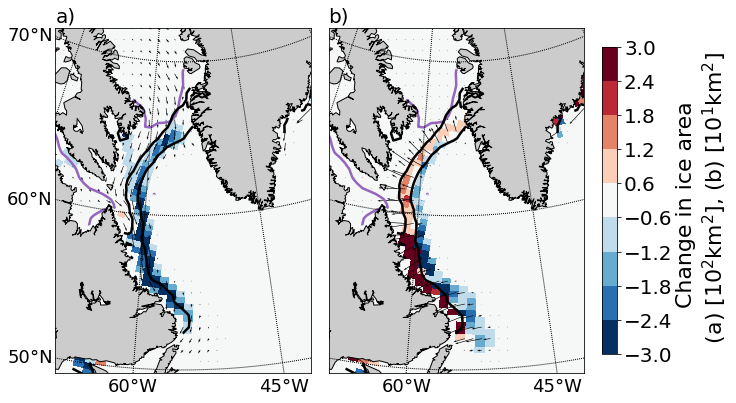

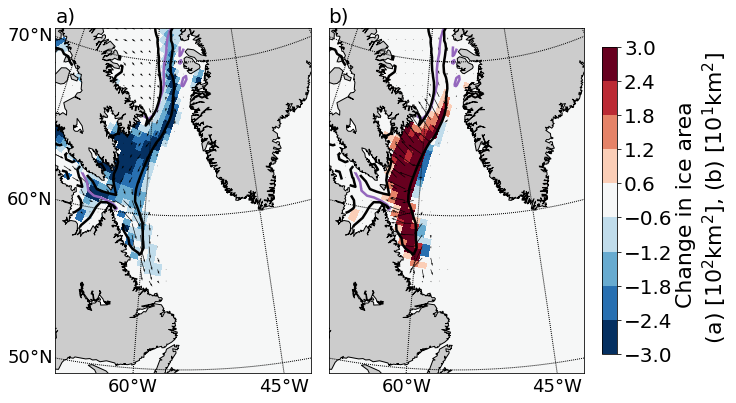

In [6]:
cmap=plt.cm.RdBu_r
import matplotlib.ticker as ticker

# norm=mpl.colors.CenteredNorm(cmap.N)
#        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
bounds = [-0.1, -0.08,-0.06, -0.04,-0.02, 0.02,0.04,0.06,0.08,0.1]
#     v_lim = max([abs(variable.max()),abs(variable.min())])
    # print(variable.max())
#     if var == 'aice':
#         #cmap=cmo.crop(cmap,vmax=0.012,vmin=-0.012,pivot=0, N=13, dmax=0.012)
# #         bounds = [-0.12,-0.1,-0.08,-0.06,-0.04,-0.02, 0.02,0.04,0.06, 0.08,0.1,0.12]
# #         bounds = [x*0.2 for x in bounds]

bounds_therm = [x*30 for x in bounds]
norm_therm = mpl.colors.BoundaryNorm(bounds_therm, cmap.N)

bounds_dyn = [x for x in bounds]
norm_dyn = mpl.colors.BoundaryNorm(bounds_dyn, cmap.N)

file_area='/aos/home/bward/wim/cice/out/case74/history/iceh_ic.2005-01-09-43200.nc'
dx_area = xr.open_dataset(file_area)
dx_area= dx_area.tarea

            
nlon=384
nlat=320

REP_nwrs='/aos/home/bward/wim/post-proc/case84/avg/'
REP_cpl='/aos/home/bward/wim/post-proc/case83/avg/'
REP_ncpl='/aos/home/bward/wim/post-proc/case85/avg/'

rep_interp='/aos/home/bward/wim/post-proc/case83'

list_month=[3,6]
list_day=[1]
col=0
m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
        lat_ts=50,lat_0=61,lon_0=-55.)
for mm in list_month:
    for dd in list_day:
        if mm != 12:
            nameFile='iceh_avg.2018'+str(mm).zfill(2)+str(dd).zfill(2)+'00000-2018'+str(mm+1).zfill(2)+str(dd).zfill(2)+'00000.nc'
        else:
            nameFile='iceh_avg.2018'+str(mm).zfill(2)+str(dd).zfill(2)+'00000-201901'+str(dd).zfill(2)+'00000.nc'            
        file_cpl=REP_cpl+nameFile
        file_ncpl=REP_ncpl+nameFile
        file_nwrs=REP_nwrs+nameFile
        
        dx_cpl = xr.open_dataset(file_cpl)
        dx_ncpl = xr.open_dataset(file_ncpl)
        dx_nwrs = xr.open_dataset(file_nwrs)
        
        lat=dx_cpl.TLAT
        lon=dx_cpl.TLON

        sic_cpl=np.squeeze(dx_cpl.aice)
        hs_cpl=np.squeeze(dx_cpl.hs)
        fsd_cpl=np.squeeze(dx_cpl.fsdrad)
        sic_ncpl=np.squeeze(dx_ncpl.aice)
        sic_nwrs=np.squeeze(dx_nwrs.aice)
        
        
        maskNH=sic_cpl.where(lat>=45)
        maskNH=maskNH.where(lat<=72)
        maskNH=maskNH.where(lon>=360-65)
        maskNH=maskNH.where(lon<=360-45)
#         maskMIZ=maskNH
        maskMIZ=maskNH.where(maskNH>=0.15)
#         fsd_cp=np.squeeze(dx_coup.fsdrad).where(aice>0.15)
#         wave_frac=np.squeeze(dx_coup.dafsd_wave[:,0,:,:])

#         maskMIZ=aice.where(lat>0)
#         maskMIZ=maskMIZ.where(aice>0.15)
#         maskfrac=maskMIZ.where(wave_frac>0)
#         maskFSD=maskMIZ.where(fsd_climo<=300)
#         maskMIZ=maskMIZ.where(maskMIZ<=0.8)

#         mask_array_1 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values < 0.15)
#         mask_array_3 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values > 0.8)
#         mask_array_4 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values > 0.8)
#         mask_array_2 = np.logical_or(avg_fsd_obs.values>300, avg_fsd_obs.values==300)

#         fsd_obs_m=ma.masked_array(avg_fsd_obs, mask=mask_array_1)
#         fsd_obs_m2=ma.masked_array(avg_fsd_obs, mask=mask_array_1+mask_array_4)
#         maskMIZ_obs=ma.masked_array(avg_aice_obs, mask=mask_array_1+mask_array_3)
#         test=ma.masked_array(avg_aice_obs, mask=mask_array_1)

#         maskMIZ_fsd_obs=ma.masked_array(avg_fsd_obs, mask=mask_array_1+mask_array_2+mask_array_4)

#         therm=(sic_cpl.where(maskMIZ>0).values-sic_ncpl.where(maskMIZ>0).values) #/sic_cpl.where(maskMIZ>0).values)*100
#         dyn=(sic_cpl.where(maskMIZ>0).values-sic_nwrs.where(maskMIZ>0).values) #/sic_cpl.where(maskMIZ>0).values)*100
        therm=(sic_cpl.values-sic_ncpl.values) #/sic_cpl.where(maskMIZ>0).values)*100
        dyn=(sic_cpl.values-sic_nwrs.values)    
        uvel_cpl=np.squeeze(dx_cpl.uvel).values
        vvel_cpl=np.squeeze(dx_cpl.vvel).values

        uvel_ncpl=np.squeeze(dx_ncpl.uvel).values
        vvel_ncpl=np.squeeze(dx_ncpl.vvel).values
        
        uvel_nwrs=np.squeeze(dx_nwrs.uvel).values
        vvel_nwrs=np.squeeze(dx_nwrs.vvel).values
        
        test_x=np.squeeze(dx_cpl.strwvx).values
        test_y=np.squeeze(dx_cpl.strwvy).values
        strxproj, stryproj, xwind, ywind=create_wind_projection(test_x, test_y, REP_cpl, nameFile, rep_interp, m, nlon, nlat)

        
        uproj, vproj, xwind, ywind=create_wind_projection(uvel_cpl, vvel_cpl, REP_cpl, nameFile, rep_interp, m, nlon, nlat)
        uproj_nwrs, vproj_nwrs, xwind, ywind=create_wind_projection(uvel_nwrs, vvel_nwrs, REP_nwrs, nameFile, rep_interp, m, nlon, nlat)
        uproj_ncpl, vproj_ncpl, xwind, ywind=create_wind_projection(uvel_ncpl, vvel_ncpl, REP_nwrs, nameFile, rep_interp, m, nlon, nlat)

        norm_cpl=np.sqrt(uproj**2+vproj**2)
        mask=np.logical_or(norm_cpl<0, norm_cpl==0)
        uprojM=ma.masked_array(uproj, mask=mask)
        vprojM=ma.masked_array(vproj, mask=mask)
        
        norm_nwrs=np.sqrt(uproj_nwrs**2+vproj_nwrs**2)
        mask_nwrs=np.logical_or(norm_nwrs<0, norm_nwrs==0)
        uprojM_nwrs=ma.masked_array(uproj_nwrs, mask=mask_nwrs)
        vprojM_nwrs=ma.masked_array(vproj_nwrs, mask=mask_nwrs)
        
        strxM=ma.masked_array(strxproj, mask=mask_nwrs)
        stryM=ma.masked_array(stryproj, mask=mask_nwrs)
        
        anom_u=uproj-uprojM_nwrs
        anom_v=vproj-vprojM_nwrs
        
        anom_u_ncpl=uprojM-uproj_ncpl
        anom_v_ncpl=vprojM-vproj_ncpl
#         dataVecX1,dataVecY1=readVectorCICEWW3(REP_IN_CICE_a, fileCI_a, t_lat, vectorVar)
#         uproj1, vproj1, xwind1, ywind1=create_wind_projection(dataVecX1, dataVecY1, REP_IN_CICE_a, fileCI_a, REP_INTERP, m, nlon, nlat)
#         uprojA = uproj-uproj1
#         vprojA = vproj-vproj1
        
        fig = plt.figure(figsize=[10, 5.5])
        fig.subplots_adjust(left=0.07, right=0.85, bottom=0.01, top=0.99) 
        gs = GridSpec(1,3, figure=fig, hspace=0.1, wspace=0.1, width_ratios=[1, 1, 0.06])

        ax1 = fig.add_subplot(gs[0, 0])
        plt.sca(ax1)
        # m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
        x,y = m(lon.values, lat.values)
        sc = m.pcolor(x, y, therm*dx_area.values/1e8, cmap=cmap, norm=norm_therm)
#         m.contour(x,y, hs_cpl.values, linewidths=2)
        cont=m.contour(x,y, fsd_cpl.values, colors='tab:purple', levels=[300], linewidths=2.5)
        cont=m.contour(x,y, sic_cpl.values, colors='k', levels=[0.15, 0.8], linewidths=2.5)
#         if(len(cont.allsegs) != 1):
#             ax1.clabel(cont, fontsize= 16)
            
        m.quiver(xwind, ywind, uprojM, vprojM)

        #, norm=norm, cmap=cmap
        none_map = ListedColormap(['none'])
#         cont2=m.contour(x,y, aice.values, colors='b', levels=[0.8], linewidths=2)
#         cont=m.pcolor(x,y, maskMIZ, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=2)
    #     test=m.pcolor(x,y, maskFSD, color='tab:green')
    #     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
#         cont2=m.contour(x,y, fsd_climo.values, colors='r', levels=[300], linewidths=3)
#         cont=m.pcolor(x,y, maskFSD, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.01, zorder=1)
    #     cont=m.pcolor(x,y, maskfrac, cmap=none_map, hatch='\\ \\ \\', edgecolor='tab:orange', linewidth=0.01, zorder=1)

        m.fillcontinents()
        m.drawcoastlines()
#         m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
#         m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

    #    axes.fill_between(cont,cont2, color="none", hatch="X", edgecolor="b", linewidth=0.0)
    #     if(len(cont.allsegs) != 1):
    #         axes.clabel(cont, fontsize= 12)
        # if(len(cont.allsegs) != 1):
        #     axes.clabel(cont, fontsize= 12) 
        m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0], size=18) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=18) # draw meridians

        ax2 = fig.add_subplot(gs[0, 1])
        plt.sca(ax2)
        # m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
        sc_obs = m.pcolor(x, y, dyn*dx_area.values/1e7, cmap=cmap, norm=norm_therm)
        cont=m.contour(x,y, fsd_cpl.values, colors='tab:purple', levels=[300], linewidths=2.5)
        cont=m.contour(x,y, sic_cpl.values, colors='k', levels=[0.15, 0.8], linewidths=2.5)
#         if(len(cont.allsegs) != 1):
#             ax2.clabel(cont, fontsize= 16)
        #, norm=norm, cmap=cmap)
#         m.quiver(xwind, ywind, anom_u, anom_v)
        m.quiver(xwind, ywind, strxM, stryM)
        none_map = ListedColormap(['none'])
#         cont2=m.contour(x_obs,y_obs,test, colors='b', levels=[0.8], linewidths=2)
#         cont=m.pcolor(x_obs,y_obs, maskMIZ_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=1)
    #     test=m.pcolor(x,y, maskFSD, color='tab:green')
    #     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
#         cont2=m.contour(x_obs,y_obs, fsd_obs_m2 , colors='r', levels=[300], linewidths=3)
#         cont=m.pcolor(x_obs,y_obs, maskMIZ_fsd_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.03, zorder=2)

        m.fillcontinents()
        m.drawcoastlines()
#         m.drawgreatcircle(-57, 45, -43, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 72, -43, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -65, 72, linewidth=3, color='k')
#         m.drawgreatcircle(-65, 51, -57, 51, linewidth=3, color='k')
#         m.drawgreatcircle(-57, 51, -57, 45, linewidth=3, color='k')
#         m.drawgreatcircle(-43, 45, -43, 72, linewidth=3, color='k')

    #    axes.fill_between(cont,cont2, color="none", hatch="X", edgecolor="b", linewidth=0.0)
    #     if(len(cont.allsegs) != 1):
    #         axes.clabel(cont, fontsize= 12)
        # if(len(cont.allsegs) != 1):
        #     axes.clabel(cont, fontsize= 12) 
        m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=18) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=18) # draw meridians
        axC1 = fig.add_subplot(gs[0, 2], aspect=20)
        cbar = fig.colorbar(sc, cax=axC1, orientation='vertical')
        cbar.ax.tick_params(labelsize=20)
        cbar.set_label('Change in ice area \n (a) [10$^{2}$km$^2$], (b) [10$^{1}$km$^2$]', size=22)
        ax1.set_title('a)', loc='left', fontsize=20)
        ax2.set_title('b)', loc='left', fontsize=20)
#     plt.subplots_adjust(wspace=0.4, hspace=0)
#     plt.tight_layout()

# cb=add_colorbar_outside(sc, axes[0], axes[0])
# cb.ax.tick_params(labelsize=18)
# cb.ax.tick_params(labelsize=18)
# cb.set_label('Mean floe diameter model [m]', size=20)

# cb=add_colorbar_outside(sc_obs, axes[1], axes[1])
# cb.ax.tick_params(labelsize=18)
# cb.ax.tick_params(labelsize=18)
# cb.set_label('Mean floe diameter obs [m]', size=20)

# plt.savefig('anom_therm_dyn_labrador_march2018.png',dpi='figure',format='png',metadata=None)

In [3]:
def plotOneVar(dataCol, dataCont, dataVec, lat, lon, repOUT, case, case2, datestr, plot_type, m, var):

    '''This function plots CICE data and creates a .png file.'''

#     cmap, norm=defineCBAnom(dataCol, var)
    norm, cmap=defineCBAnom(dataCol, var)
    # orig_map=plt.cm.get_cmap('Spectral')
    # reversed_map = orig_map.reversed()

    # Suppress Matplotlib deprecation warnings
    warnings.filterwarnings("ignore", category=UserWarning)

    fig, axes = plt.subplots(1,1,figsize=[14,8])

    plt.sca(axes)

    #Choose projection
    m.drawcoastlines()
    m.fillcontinents()

    # Longitude need to be between -180 and 180 for plotting
    lon1 = lon.copy()
    for lt in range(lon.shape[0]):
        for lg in range(lon.shape[1]):
            pt=lon[lt,lg]
            if pt >= 180:
                lon1[lt,lg]=lon1[lt,lg]-360. 
    lon = lon1

    #No need for reordering the datas, just create empty arrays.
    d = np.zeros((dataCol.shape[0],dataCol.shape[1]+1))
    lon_cyc = np.zeros((lon.shape[0],lon.shape[1]+1))
    mask = np.zeros((dataCol.shape[0],dataCol.shape[1]+1))
    lat_cyc = np.zeros((lat.shape[0],lat.shape[1]+1))
    #Simply fill the arrays
    mask[:,0:-1] = dataCol.mask[:,:]
    mask[:,-1] = dataCol.mask[:,0]
    lon_cyc[:,0:-1] = lon[:,:]; lon_cyc[:,-1] = lon[:,0]
    lat_cyc[:,0:-1] = lat[:,:]; lat_cyc[:,-1] = lat[:,0]
    d[:,0:-1] = dataCol[:,:]
    d[:,-1] = dataCol[:,0]
    # Apply mask to ice field
    d1 = np.ma.masked_array(d,mask=mask)

    #Idem with contour
    if dataCont.size != 0:
        dCont = np.zeros((dataCont.shape[0],dataCont.shape[1]+1))
        maskCont=np.zeros((dataCont.shape[0],dataCont.shape[1]+1))
        maskCont[:,0:-1] = dataCont.mask[:,:]
        maskCont[:,-1] = dataCont.mask[:,0]
        dCont[:,0:-1] = dataCont[:,:]
        dCont[:,-1] = dataCont[:,0]
        d1Cont=np.ma.masked_array(dCont,mask=maskCont)
    
    # if dataVec[0].size != 0 and dataVec[1].size != 0:
    #     dataVecX=dataVec[0]
    #     dataVecY=dataVec[1]
    #     dVecX = np.zeros((dataVecX.shape[0],dataVecX.shape[1]+1))
    #     dVecY = np.zeros((dataVecY.shape[0],dataVecY.shape[1]+1))
    #     maskVec=np.zeros((dataVecX.shape[0],dataVecX.shape[1]+1))
    #     maskVec[:,0:-1] = dataVecX.mask[:,:]
    #     maskVec[:,-1] = dataVecX.mask[:,0]
    #     dVecX[:,0:-1] = dataVecX[:,:]
    #     dVecX[:,-1] = dataVecX[:,0]
    #     d1VecX=np.ma.masked_array(dVecX,mask=maskVec)
    #     dVecY[:,0:-1] = dataVecY[:,:]
    #     dVecY[:,-1] = dataVecY[:,0]
    #     d1VecY=np.ma.masked_array(dVecY,mask=maskVec)


    x, y = m(lon_cyc, lat_cyc)

    if plot_type == 'contour':
        #Plot ice fields
#         sc = m.contourf(x, y, np.where(lat_cyc>0, d1), cmap=reversed_map)
        #Plot contour
        if dataCont.size != 0:
            cont=axes.contour(x,y, d1Cont, colors='black', levels=[0.15])
            if(len(cont.allsegs) != 1):
                axes.clabel(cont, fontsize= 12)
        #         axes.clabel(cont, fontsize= 12)
        # # Rotate and interpolate to have a nice wind field in the projection.
        # uproj, vproj, xwind, ywind = create_wind_projection(REP_IN_W3, fileW3, REP_IN_CICE, fileCI, m, wnd_var,nlon,nlat)
        # # Plot winds
        # Q = m.quiver(xwind, ywind,uproj,vproj,scale=250)
    else:  # pcolor
        cmap = cm.get_cmap('RdBu_r', 11)
        mask_lab= np.logical_or(lon_cyc<=-65, lon_cyc>=-43)
        mask_lab2= np.logical_or(lat_cyc<=45, lat_cyc>=72)
        d1_mask=ma.masked_array(d1, mask=mask_lab+mask_lab2)
        sc = m.pcolor(x, y, d1_mask, cmap=cmap, norm=mpl.colors.CenteredNorm())
#Temporary?
        if dataCont.size != 0:
            cont=axes.contour(x,y, d1Cont, colors='k', levels=[0.15, 0.8])
            if(len(cont.allsegs) != 1):
                axes.clabel(cont, fontsize= 12)

        if dataVec[0].size != 0:
            xwind=dataVec[2]
            ywind=dataVec[3]
            uproj=dataVec[0]
            vproj=dataVec[1]
            norm=np.sqrt(uproj**2+vproj**2)
            mask=np.logical_or(norm<0, norm==0)
            uprojM=ma.masked_array(uproj, mask=mask)
            vprojM=ma.masked_array(vproj, mask=mask)
            scaleFac=np.amax(uproj+vproj)
            axes.quiver(xwind, ywind, uprojM, vprojM) #, scale = 800/25*scaleFac,  pivot='middle')
#            axes.barbs(x,y,d1VecX, d1VecY, length=4, pivot='middle')

    m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0], size=16) # draw parallels
    m.drawmeridians(np.arange(0.,420.,15.),labels=[1,1,0,1], size=16) # draw meridians
    cb=fig.colorbar(sc, ax=axes)
    cb.ax.tick_params(labelsize=18)

    if var == 'ice' or var == 'aice':
        cb.set_label('Ice Concentration', size=20)
    elif var == 'ic1' or var == 'hi':
        cb.set_label('Ice Thickess [m]', size=20)
    elif var == 'ic5' or var == 'fsdrad':
        cb.set_label('Mean Floe Diameter [m]', size=20)
    elif var == 'dafsd_newi':
        cb.set_label('Change in FSD(12) : new ice [1/s]', size=20)
    elif var == 'dafsd_weld':
        cb.set_label('Change in FSD(12) : weld. [1/s]', size=20)
    elif var == 'dafsd_latg':
        cb.set_label('Change in FSD(1) : lat. g. [1/s]', size=20)
    elif var == 'dafsd_latm':
        cb.set_label('Change in FSD(1) : lat. m. [1/s]', size=20)
    elif var == 'dafsd_wave':
        cb.set_label('Change in FSD(1) : wave [1/s]', size=20)
    elif var == 'strair':
        cb.set_label('Wind Stress [N/m2]', size=20)
    elif var == 'strwv':
        cb.set_label('Wave Radiation Stress [N/m2]', size=20)
    elif var == 'strnorm':
        cb.set_label('Normalized Stress [1]', size=20)
    elif var == 'hs':
        cb.set_label('Significant Wave Height [m]', size=20)
    elif var == 'lm':
        cb.set_label('Average Wavelenght', size=20)

    axes.set_title(datestr, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.97)
#    plt.savefig(repOUT+"/"+case+"_WaveIce_"+datestr, bbbox_to_anchor='tight', dpi=500)
#     plt.savefig(repOUT+"/anom_"+case+"-"+case2+"_"+datestr+"_"+var+".png",dpi='figure',format='png',metadata=None, bbbox_inches='tight')
#     print("------------"+"anom_"+case+"-"+case2+"_"+datestr+"_"+var+" as been plotted---------------------")


384 320
Time step 1: 2018-03-07 00:00:00
CICE file : /aos/home/bward/wim/cice/out/case91/history/iceh_avg.2018-03-07.nc WW3 file : /aos/home/bward/wim/cice/out/case91/history/iceh_avg.2018-03-07.nc
0.01989013
-0.037664413


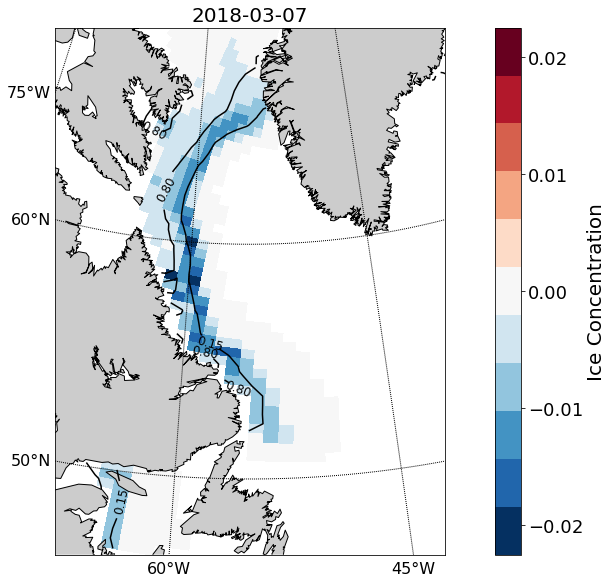

In [4]:
def main():

    REP_OUT_CI='/aos/home/bward/wim/cice/out/'
    
    #Assign arguments to variables
    pp_prod='avg'
    grid='wimgx1'
    outfreq=1
    outfreqU='d'
    timeStep=3600
    coupledWW3='true'
    coupledCICE='true'
    nb_ts=1
    start_y=2018
    start_d=7
    start_m=3
    start_s=0    
    start_day=datetime(start_y, start_m, start_d)+timedelta(seconds=start_s)
    exp='case91'
    exp_a='case92'
    REP_IN_W3='/aos/home/bward/wim/cice/out/'+exp+'/history'
    REP_IN_CICE='/aos/home/bward/wim/cice/out/'+exp+'/history'
    REP_IN_W3_a='/aos/home/bward/wim/cice/out/'+exp_a+'/history'
    REP_IN_CICE_a='/aos/home/bward/wim/cice/out/'+exp_a+'/history'
    REP_OUT='/aos/home/bward/wim/post-proc/'+exp
    add_contour='true'
    contourVar='aice'
    add_vector='false'
    vectorVar=['uvel', 'vvel']
    region='labrador'
    list_var=['aice']
    #Define stuff
    if coupledWW3 == "true"  and coupledCICE == "true":
        coupled="true"
    else:
        coupled="false"

    if add_contour == "true":
        add_contour=True
    else:
        add_contour=False
    if add_vector == "true":
        add_vector=True
    else:
        add_vector=False

    if pp_prod == "avg":
        list_avg=createListDateTime(start_day, outfreq, outfreqU, nb_ts+1)
    else:
        list_avg=[]

    list_ts=createListDateTime(start_day, outfreq, outfreqU, nb_ts)
    list_varWW3=['hs', 'lm']
    list_varCICE=['aice', 'hi', 'fsdrad']
    list_varNonStdCICE=['strair', 'strwv', 'strnorm']
    list_varFSDCICE=['dafsd_latg', 'dafsd_latm', 'dafsd_newi', 'dafsd_wave', 'dafsd_weld']
    list_varVecCICE=['strairx', 'strairy', 'uvel', 'vvel', 'strwvx', 'strwvy', 'uatm', 'vatm']
    list_varVecWW3=[]

    if grid == 'wim2p5':

        grdRes=25
        grdMax=2475
        grdMin=-25
        xgrid=np.arange(grdMin, grdMax, grdRes)
        ygrid=np.arange(grdMin, grdMax, grdRes)
        m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
    elif grid == 'wimgx3' or grid == 'wimgx1' or grid == 'wimtx1':
        if region == 'panarc':
            m = Basemap(projection='npstere', boundinglat=35,lon_0=270, resolution='l')
        elif region == 'labrador':
            m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
            lat_ts=50,lat_0=58,lon_0=-55.)

        datetimeStart=start_day
        if coupled == "true":
            rep_strt='/aos/home/bward/wim/cice/out/case83/history'
            file_strt='iceh_01h.2018-12-31-79200.nc'
            # datestrStart=str(datetimeStart.year).zfill(4)+"-"+str(datetimeStart.month).zfill(2)+"-"+str(datetimeStart.day).zfill(2)+"-"+str(datetimeStart.hour*3600).zfill(5)
            # file_strt="ww3."+datestrStart+".nc"
            # rep_strt=REP_IN_W3
            # nlon, nlat, t_lat, t_lon = get_geomWW3(rep_strt, file_strt)
#             rep_strt=REP_IN_CICE
#             cmd_list="ls "+rep_strt+"/"+"| tail -n 1"
#             file_strt = str(subprocess.check_output(cmd_list, shell=True).rstrip())[2:-1]
            nlon, nlat, t_lat, t_lon=get_geomCICE(rep_strt, file_strt)
        elif coupledWW3 == "false":
            datestrStart=str(datetimeStart.year).zfill(4)+str(datetimeStart.month).zfill(2)+str(datetimeStart.day).zfill(2)+"T"+str(datetimeStart.hour).zfill(2)+"Z"
            if (args.iceIc is None or args.repIceIc is None):
                file_strt="ww3."+datestrStart+".nc"
                rep_strt=REP_IN_W3
            else:
                file_strt=args.iceIc
                rep_strt=args.repIceIce
            nlon, nlat, t_lat, t_lon = get_geomWW3(rep_strt, file_strt)
        elif coupledCICE == "false":
            #Take any file in the CICE out directory. 
            rep_strt='/aos/home/bward/wim/cice/out/case83/history'
            cmd_list="ls "+rep_strt+"/"+"| tail -n 1"
            file_strt = str(subprocess.check_output(cmd_list, shell=True).rstrip())[2:-1]
            nlon, nlat, t_lat, t_lon=get_geomCICE(rep_strt, file_strt)

    i=1
    #Plot hourly, or averaged datas, or ?. 
    print(nlon,nlat)
    for ts in list_ts:
        print("Time step "+str(i)+":",ts)
        fileCI='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        fileW3='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        fileCI_a='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        fileW3_a='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        
        date4str=str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)
#         fileCI,fileW3,date4str=findFilesCICEWW3(ts, pp_prod, coupled, coupledWW3, coupledCICE, timeStep, outfreqU, list_avg,i)
#         fileCI_a,fileW3_a,date4str=findFilesCICEWW3(ts, pp_prod, coupled, coupledWW3, coupledCICE, timeStep, outfreqU, list_avg,i)
        print("CICE file : "+REP_IN_CICE+"/"+fileCI, "WW3 file : "+REP_IN_W3+"/"+fileW3)
        for var in list_var:

        #Read variable for color
            if var in list_varCICE:
                data_1=readDataCICEWW3(REP_IN_CICE, fileCI, t_lat, var)
                data_2=readDataCICEWW3(REP_IN_CICE_a, fileCI_a, t_lat, var)
            elif var in list_varWW3:
                data_1=readDataCICEWW3(REP_IN_W3, fileW3, t_lat, var)
                data_2=readDataCICEWW3(REP_IN_W3_a, fileW3_a, t_lat, var)
            elif var in list_varNonStdCICE:
                data_1=readDataNonStdCICE(REP_IN_W3, fileW3, t_lat, var)
                data_2=readDataCICEWW3(REP_IN_W3_a, fileW3_a, t_lat, var)
            elif var in list_varFSDCICE:
                if var == "dafsd_latm" or var == "dafsd_wave" or var == "dafsd_latg":
                    data_1=readFsdVarCICE(REP_IN_W3, fileW3, t_lat, var, 0)
                    data_2=readFsdVarCICE(REP_IN_W3_a, fileW3_a, t_lat, var, 0)
                elif var == "dafsd_weld" or var == "dafsd_newi" :
                    data_1=readFsdVarCICE(REP_IN_W3, fileW3, t_lat, var, 11)
                    data_2=readFsdVarCICE(REP_IN_W3_a, fileW3_a, t_lat, var, 0)
            else:
                print("Unknown var")
                return
            #Compute anom
            data = data_1-data_2
            #Read variable for contour
            if add_contour:
                if contourVar in list_varCICE:
                    dataCont=readDataCICEWW3(REP_IN_CICE, fileCI, t_lat, contourVar)
                elif contourVar in list_varWW3:
                    dataCont=readDataCICEWW3(REP_IN_W3, fileW3, t_lat, contourVar)
            else:
                dataCont=np.array([])
            
            #Read variable for vector
            REP_INTERP=REP_OUT+"/interp"
            if add_vector:
                if (vectorVar[0] in list_varVecCICE) and (vectorVar[1] in list_varVecCICE) :
                    dataVecX,dataVecY=readVectorCICEWW3(REP_IN_CICE, fileCI, t_lat, vectorVar)
                    uproj, vproj, xwind, ywind=create_wind_projection(dataVecX, dataVecY, REP_IN_CICE, fileCI, REP_INTERP, m, nlon, nlat)
                    dataVecX1,dataVecY1=readVectorCICEWW3(REP_IN_CICE_a, fileCI_a, t_lat, vectorVar)
                    uproj1, vproj1, xwind1, ywind1=create_wind_projection(dataVecX1, dataVecY1, REP_IN_CICE_a, fileCI_a, REP_INTERP, m, nlon, nlat)
                    uprojA = uproj-uproj1
                    vprojA = vproj-vproj1
                elif (vectorVar[0] in list_varVecWW3) and (vectorVar[1] in list_varVecWW3):
                    dataVecX,dataVecY=readVectorCICEWW3(REP_IN_W3, fileW3, t_lat, vectorVar)
                    uproj, vproj, xwind, ywind=create_wind_projection(dataVecX, dataVecY, REP_IN_W3, fileW3, REP_INTERP, m, nlon, nlat)
                    dataVecX1,dataVecY1=readVectorCICEWW3(REP_IN_W3_a, fileW3_a, t_lat, vectorVar)
                    uproj1, vproj1, xwind1, ywind1=create_wind_projection(dataVecX1, dataVecY1, REP_IN_W3_a, fileW3, REP_INTERP, m, nlon, nlat)
                    uprojA = uproj-uproj1
                    vprojA = vproj-vproj1
            else:
                uprojA=np.array([])
                vprojA=np.array([])
                xwind=np.array([])
                ywind=np.array([])

            dataVec=[uprojA, vprojA, xwind, ywind]

            if grid == 'wim2p5':
                plotWaveIceIdeal(data, dataCont, dataVec, REP_OUT, exp, datestrW3, xgrid, ygrid, list_var)
            if grid == 'wimgx3' or grid == 'wimgx1' or grid == 'wimtx1':
                plotOneVar(data, dataCont, dataVec, t_lat, t_lon, REP_OUT, exp, exp_a, date4str, 'pcolor', m, var)
        #         if len(list_var) == 1:
        #            plotOneVar(REP_IN_CICE, fileCI, REP_IN_W3, fileW3, nlon, nlat, t_lat, t_lon, REP_OUT, exp, datestrW3, 'pcolor', list_var)
        #         else:
#                    plotWaveIceArctic(REP_IN_CICE, fileCI, REP_IN_W3, fileW3, nlon, nlat, t_lat, t_lon, REP_OUT, exp, datestrW3, 'pcolor', list_var)
        i=i+1

#Call main
if __name__ == "__main__":
    main()


Time step 1: 2018-03-07 00:00:00
CICE file : /aos/home/bward/wim/cice/out/case91/history/iceh_avg.2018-03-07.nc WW3 file : /aos/home/bward/wim/cice/out/case91/history/iceh_avg.2018-03-07.nc
0.28501552
-0.10277116


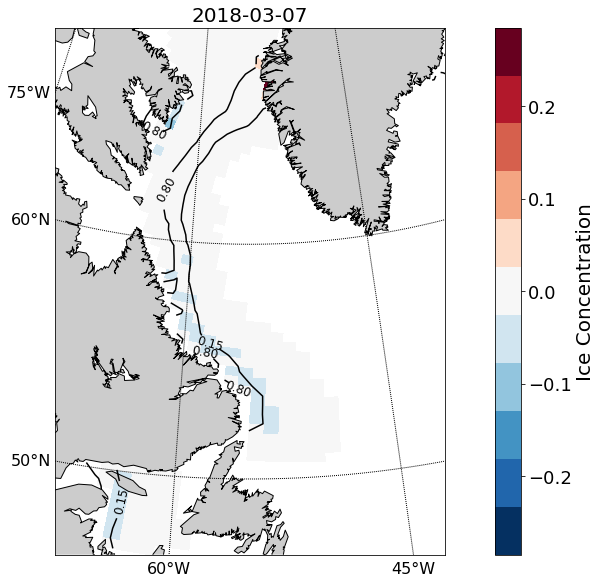

In [5]:
def main():

    REP_OUT_CI='/aos/home/bward/wim/cice/out/'
    
    #Assign arguments to variables
    pp_prod='avg'
    grid='wimgx1'
    outfreq=1
    outfreqU='d'
    timeStep=3600
    coupledWW3='true'
    coupledCICE='true'
    nb_ts=1
    start_y=2018
    start_d=7
    start_m=3
    start_s=0    
    start_day=datetime(start_y, start_m, start_d)+timedelta(seconds=start_s)
    exp='case91'
    exp_a='case93'
    REP_IN_W3='/aos/home/bward/wim/cice/out/'+exp+'/history'
    REP_IN_CICE='/aos/home/bward/wim/cice/out/'+exp+'/history'
    REP_IN_W3_a='/aos/home/bward/wim/cice/out/'+exp_a+'/history'
    REP_IN_CICE_a='/aos/home/bward/wim/cice/out/'+exp_a+'/history'
    REP_OUT='/aos/home/bward/wim/post-proc/'+exp
    add_contour='true'
    contourVar='aice'
    add_vector='false'
    vectorVar=['uvel', 'vvel']
    region='labrador'
    list_var=['aice']
    #Define stuff
    if coupledWW3 == "true"  and coupledCICE == "true":
        coupled="true"
    else:
        coupled="false"

    if add_contour == "true":
        add_contour=True
    else:
        add_contour=False
    if add_vector == "true":
        add_vector=True
    else:
        add_vector=False

    if pp_prod == "avg":
        list_avg=createListDateTime(start_day, outfreq, outfreqU, nb_ts+1)
    else:
        list_avg=[]

    list_ts=createListDateTime(start_day, outfreq, outfreqU, nb_ts)
    list_varWW3=['hs', 'lm']
    list_varCICE=['aice', 'hi', 'fsdrad']
    list_varNonStdCICE=['strair', 'strwv', 'strnorm']
    list_varFSDCICE=['dafsd_latg', 'dafsd_latm', 'dafsd_newi', 'dafsd_wave', 'dafsd_weld']
    list_varVecCICE=['strairx', 'strairy', 'uvel', 'vvel', 'strwvx', 'strwvy', 'uatm', 'vatm']
    list_varVecWW3=[]

    if grid == 'wim2p5':

        grdRes=25
        grdMax=2475
        grdMin=-25
        xgrid=np.arange(grdMin, grdMax, grdRes)
        ygrid=np.arange(grdMin, grdMax, grdRes)
        m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
    elif grid == 'wimgx3' or grid == 'wimgx1' or grid == 'wimtx1':
        if region == 'panarc':
            m = Basemap(projection='npstere', boundinglat=35,lon_0=270, resolution='l')
        elif region == 'labrador':
            m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
            lat_ts=50,lat_0=58,lon_0=-55.)

        datetimeStart=start_day
        if coupled == "true":
            rep_strt='/aos/home/bward/wim/cice/out/case83/history'
            file_strt='iceh_01h.2018-12-31-79200.nc'
            # datestrStart=str(datetimeStart.year).zfill(4)+"-"+str(datetimeStart.month).zfill(2)+"-"+str(datetimeStart.day).zfill(2)+"-"+str(datetimeStart.hour*3600).zfill(5)
            # file_strt="ww3."+datestrStart+".nc"
            # rep_strt=REP_IN_W3
            # nlon, nlat, t_lat, t_lon = get_geomWW3(rep_strt, file_strt)
#             rep_strt=REP_IN_CICE
#             cmd_list="ls "+rep_strt+"/"+"| tail -n 1"
#             file_strt = str(subprocess.check_output(cmd_list, shell=True).rstrip())[2:-1]
            nlon, nlat, t_lat, t_lon=get_geomCICE(rep_strt, file_strt)
        elif coupledWW3 == "false":
            datestrStart=str(datetimeStart.year).zfill(4)+str(datetimeStart.month).zfill(2)+str(datetimeStart.day).zfill(2)+"T"+str(datetimeStart.hour).zfill(2)+"Z"
            if (args.iceIc is None or args.repIceIc is None):
                file_strt="ww3."+datestrStart+".nc"
                rep_strt=REP_IN_W3
            else:
                file_strt=args.iceIc
                rep_strt=args.repIceIce
            nlon, nlat, t_lat, t_lon = get_geomWW3(rep_strt, file_strt)
        elif coupledCICE == "false":
            #Take any file in the CICE out directory. 
            rep_strt='/aos/home/bward/wim/cice/out/case83/history'
            cmd_list="ls "+rep_strt+"/"+"| tail -n 1"
            file_strt = str(subprocess.check_output(cmd_list, shell=True).rstrip())[2:-1]
            nlon, nlat, t_lat, t_lon=get_geomCICE(rep_strt, file_strt)

    i=1
    #Plot hourly, or averaged datas, or ?. 
    for ts in list_ts:
        print("Time step "+str(i)+":",ts)
        fileCI='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        fileW3='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        fileCI_a='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        fileW3_a='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        
        date4str=str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)
#         fileCI,fileW3,date4str=findFilesCICEWW3(ts, pp_prod, coupled, coupledWW3, coupledCICE, timeStep, outfreqU, list_avg,i)
#         fileCI_a,fileW3_a,date4str=findFilesCICEWW3(ts, pp_prod, coupled, coupledWW3, coupledCICE, timeStep, outfreqU, list_avg,i)
        print("CICE file : "+REP_IN_CICE+"/"+fileCI, "WW3 file : "+REP_IN_W3+"/"+fileW3)
        for var in list_var:

        #Read variable for color
            if var in list_varCICE:
                data_1=readDataCICEWW3(REP_IN_CICE, fileCI, t_lat, var)
                data_2=readDataCICEWW3(REP_IN_CICE_a, fileCI_a, t_lat, var)
            elif var in list_varWW3:
                data_1=readDataCICEWW3(REP_IN_W3, fileW3, t_lat, var)
                data_2=readDataCICEWW3(REP_IN_W3_a, fileW3_a, t_lat, var)
            elif var in list_varNonStdCICE:
                data_1=readDataNonStdCICE(REP_IN_W3, fileW3, t_lat, var)
                data_2=readDataCICEWW3(REP_IN_W3_a, fileW3_a, t_lat, var)
            elif var in list_varFSDCICE:
                if var == "dafsd_latm" or var == "dafsd_wave" or var == "dafsd_latg":
                    data_1=readFsdVarCICE(REP_IN_W3, fileW3, t_lat, var, 0)
                    data_2=readFsdVarCICE(REP_IN_W3_a, fileW3_a, t_lat, var, 0)
                elif var == "dafsd_weld" or var == "dafsd_newi" :
                    data_1=readFsdVarCICE(REP_IN_W3, fileW3, t_lat, var, 11)
                    data_2=readFsdVarCICE(REP_IN_W3_a, fileW3_a, t_lat, var, 0)
            else:
                print("Unknown var")
                return
            #Compute anom
            data = data_1-data_2
            #Read variable for contour
            if add_contour:
                if contourVar in list_varCICE:
                    dataCont=readDataCICEWW3(REP_IN_CICE, fileCI, t_lat, contourVar)
                elif contourVar in list_varWW3:
                    dataCont=readDataCICEWW3(REP_IN_W3, fileW3, t_lat, contourVar)
            else:
                dataCont=np.array([])
            
            #Read variable for vector
            REP_INTERP=REP_OUT+"/interp"
            if add_vector:
                if (vectorVar[0] in list_varVecCICE) and (vectorVar[1] in list_varVecCICE) :
                    dataVecX,dataVecY=readVectorCICEWW3(REP_IN_CICE, fileCI, t_lat, vectorVar)
                    uproj, vproj, xwind, ywind=create_wind_projection(dataVecX, dataVecY, REP_IN_CICE, fileCI, REP_INTERP, m, nlon, nlat)
                    dataVecX1,dataVecY1=readVectorCICEWW3(REP_IN_CICE_a, fileCI_a, t_lat, vectorVar)
                    uproj1, vproj1, xwind1, ywind1=create_wind_projection(dataVecX1, dataVecY1, REP_IN_CICE_a, fileCI_a, REP_INTERP, m, nlon, nlat)
                    uprojA = uproj-uproj1
                    vprojA = vproj-vproj1
                elif (vectorVar[0] in list_varVecWW3) and (vectorVar[1] in list_varVecWW3):
                    dataVecX,dataVecY=readVectorCICEWW3(REP_IN_W3, fileW3, t_lat, vectorVar)
                    uproj, vproj, xwind, ywind=create_wind_projection(dataVecX, dataVecY, REP_IN_W3, fileW3, REP_INTERP, m, nlon, nlat)
                    dataVecX1,dataVecY1=readVectorCICEWW3(REP_IN_W3_a, fileW3_a, t_lat, vectorVar)
                    uproj1, vproj1, xwind1, ywind1=create_wind_projection(dataVecX1, dataVecY1, REP_IN_W3_a, fileW3, REP_INTERP, m, nlon, nlat)
                    uprojA = uproj-uproj1
                    vprojA = vproj-vproj1
            else:
                uprojA=np.array([])
                vprojA=np.array([])
                xwind=np.array([])
                ywind=np.array([])

            dataVec=[uprojA, vprojA, xwind, ywind]

            if grid == 'wim2p5':
                plotWaveIceIdeal(data, dataCont, dataVec, REP_OUT, exp, datestrW3, xgrid, ygrid, list_var)
            if grid == 'wimgx3' or grid == 'wimgx1' or grid == 'wimtx1':
                plotOneVar(data, dataCont, dataVec, t_lat, t_lon, REP_OUT, exp, exp_a, date4str, 'pcolor', m, var)
        #         if len(list_var) == 1:
        #            plotOneVar(REP_IN_CICE, fileCI, REP_IN_W3, fileW3, nlon, nlat, t_lat, t_lon, REP_OUT, exp, datestrW3, 'pcolor', list_var)
        #         else:
#                    plotWaveIceArctic(REP_IN_CICE, fileCI, REP_IN_W3, fileW3, nlon, nlat, t_lat, t_lon, REP_OUT, exp, datestrW3, 'pcolor', list_var)
        i=i+1

#Call main
if __name__ == "__main__":
    main()


Time step 1: 2018-03-05 00:00:00
CICE file : /aos/home/bward/wim/cice/out/case91/history/iceh_avg.2018-03-05.nc WW3 file : /aos/home/bward/wim/cice/out/case91/history/iceh_avg.2018-03-05.nc
0.012820005
-0.011573523


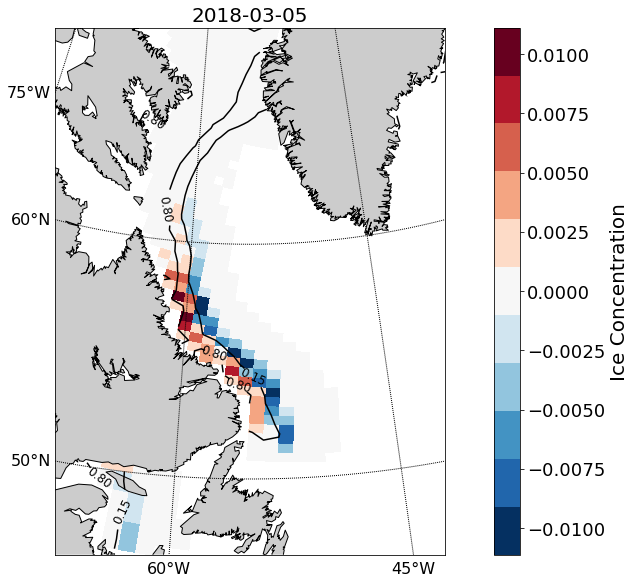

In [6]:
def main():

    REP_OUT_CI='/aos/home/bward/wim/cice/out/'
    
    #Assign arguments to variables
    pp_prod='avg'
    grid='wimgx1'
    outfreq=1
    outfreqU='d'
    timeStep=3600
    coupledWW3='true'
    coupledCICE='true'
    nb_ts=1
    start_y=2018
    start_d=5
    start_m=3
    start_s=0    
    start_day=datetime(start_y, start_m, start_d)+timedelta(seconds=start_s)
    exp='case91'
    exp_a='case94'
    REP_IN_W3='/aos/home/bward/wim/cice/out/'+exp+'/history'
    REP_IN_CICE='/aos/home/bward/wim/cice/out/'+exp+'/history'
    REP_IN_W3_a='/aos/home/bward/wim/cice/out/'+exp_a+'/history'
    REP_IN_CICE_a='/aos/home/bward/wim/cice/out/'+exp_a+'/history'
    REP_OUT='/aos/home/bward/wim/post-proc/'+exp
    add_contour='true'
    contourVar='aice'
    add_vector='false'
    vectorVar=['uvel', 'vvel']
    region='labrador'
    list_var=['aice']
    #Define stuff
    if coupledWW3 == "true"  and coupledCICE == "true":
        coupled="true"
    else:
        coupled="false"

    if add_contour == "true":
        add_contour=True
    else:
        add_contour=False
    if add_vector == "true":
        add_vector=True
    else:
        add_vector=False

    if pp_prod == "avg":
        list_avg=createListDateTime(start_day, outfreq, outfreqU, nb_ts+1)
    else:
        list_avg=[]

    list_ts=createListDateTime(start_day, outfreq, outfreqU, nb_ts)
    list_varWW3=['hs', 'lm']
    list_varCICE=['aice', 'hi', 'fsdrad']
    list_varNonStdCICE=['strair', 'strwv', 'strnorm']
    list_varFSDCICE=['dafsd_latg', 'dafsd_latm', 'dafsd_newi', 'dafsd_wave', 'dafsd_weld']
    list_varVecCICE=['strairx', 'strairy', 'uvel', 'vvel', 'strwvx', 'strwvy', 'uatm', 'vatm']
    list_varVecWW3=[]

    if grid == 'wim2p5':

        grdRes=25
        grdMax=2475
        grdMin=-25
        xgrid=np.arange(grdMin, grdMax, grdRes)
        ygrid=np.arange(grdMin, grdMax, grdRes)
        m = Basemap(projection='npstere', boundinglat=45,lon_0=270, resolution='l')
    elif grid == 'wimgx3' or grid == 'wimgx1' or grid == 'wimtx1':
        if region == 'panarc':
            m = Basemap(projection='npstere', boundinglat=35,lon_0=270, resolution='l')
        elif region == 'labrador':
            m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
            lat_ts=50,lat_0=58,lon_0=-55.)

        datetimeStart=start_day
        if coupled == "true":
            rep_strt='/aos/home/bward/wim/cice/out/case83/history'
            file_strt='iceh_01h.2018-12-31-79200.nc'
            # datestrStart=str(datetimeStart.year).zfill(4)+"-"+str(datetimeStart.month).zfill(2)+"-"+str(datetimeStart.day).zfill(2)+"-"+str(datetimeStart.hour*3600).zfill(5)
            # file_strt="ww3."+datestrStart+".nc"
            # rep_strt=REP_IN_W3
            # nlon, nlat, t_lat, t_lon = get_geomWW3(rep_strt, file_strt)
#             rep_strt=REP_IN_CICE
#             cmd_list="ls "+rep_strt+"/"+"| tail -n 1"
#             file_strt = str(subprocess.check_output(cmd_list, shell=True).rstrip())[2:-1]
            nlon, nlat, t_lat, t_lon=get_geomCICE(rep_strt, file_strt)
        elif coupledWW3 == "false":
            datestrStart=str(datetimeStart.year).zfill(4)+str(datetimeStart.month).zfill(2)+str(datetimeStart.day).zfill(2)+"T"+str(datetimeStart.hour).zfill(2)+"Z"
            if (args.iceIc is None or args.repIceIc is None):
                file_strt="ww3."+datestrStart+".nc"
                rep_strt=REP_IN_W3
            else:
                file_strt=args.iceIc
                rep_strt=args.repIceIce
            nlon, nlat, t_lat, t_lon = get_geomWW3(rep_strt, file_strt)
        elif coupledCICE == "false":
            #Take any file in the CICE out directory. 
            rep_strt='/aos/home/bward/wim/cice/out/case83/history'
            cmd_list="ls "+rep_strt+"/"+"| tail -n 1"
            file_strt = str(subprocess.check_output(cmd_list, shell=True).rstrip())[2:-1]
            nlon, nlat, t_lat, t_lon=get_geomCICE(rep_strt, file_strt)

    i=1
    #Plot hourly, or averaged datas, or ?. 
    for ts in list_ts:
        print("Time step "+str(i)+":",ts)
        fileCI='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        fileW3='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        fileCI_a='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        fileW3_a='iceh_avg.'+str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)+'.nc'
        
        date4str=str(ts.year).zfill(4)+"-"+str(ts.month).zfill(2)+"-"+str(ts.day).zfill(2)
#         fileCI,fileW3,date4str=findFilesCICEWW3(ts, pp_prod, coupled, coupledWW3, coupledCICE, timeStep, outfreqU, list_avg,i)
#         fileCI_a,fileW3_a,date4str=findFilesCICEWW3(ts, pp_prod, coupled, coupledWW3, coupledCICE, timeStep, outfreqU, list_avg,i)
        print("CICE file : "+REP_IN_CICE+"/"+fileCI, "WW3 file : "+REP_IN_W3+"/"+fileW3)
        for var in list_var:

        #Read variable for color
            if var in list_varCICE:
                data_1=readDataCICEWW3(REP_IN_CICE, fileCI, t_lat, var)
                data_2=readDataCICEWW3(REP_IN_CICE_a, fileCI_a, t_lat, var)
            elif var in list_varWW3:
                data_1=readDataCICEWW3(REP_IN_W3, fileW3, t_lat, var)
                data_2=readDataCICEWW3(REP_IN_W3_a, fileW3_a, t_lat, var)
            elif var in list_varNonStdCICE:
                data_1=readDataNonStdCICE(REP_IN_W3, fileW3, t_lat, var)
                data_2=readDataCICEWW3(REP_IN_W3_a, fileW3_a, t_lat, var)
            elif var in list_varFSDCICE:
                if var == "dafsd_latm" or var == "dafsd_wave" or var == "dafsd_latg":
                    data_1=readFsdVarCICE(REP_IN_W3, fileW3, t_lat, var, 0)
                    data_2=readFsdVarCICE(REP_IN_W3_a, fileW3_a, t_lat, var, 0)
                elif var == "dafsd_weld" or var == "dafsd_newi" :
                    data_1=readFsdVarCICE(REP_IN_W3, fileW3, t_lat, var, 11)
                    data_2=readFsdVarCICE(REP_IN_W3_a, fileW3_a, t_lat, var, 0)
            else:
                print("Unknown var")
                return
            #Compute anom
            data = data_1-data_2
            #Read variable for contour
            if add_contour:
                if contourVar in list_varCICE:
                    dataCont=readDataCICEWW3(REP_IN_CICE, fileCI, t_lat, contourVar)
                elif contourVar in list_varWW3:
                    dataCont=readDataCICEWW3(REP_IN_W3, fileW3, t_lat, contourVar)
            else:
                dataCont=np.array([])
            
            #Read variable for vector
            REP_INTERP=REP_OUT+"/interp"
            if add_vector:
                if (vectorVar[0] in list_varVecCICE) and (vectorVar[1] in list_varVecCICE) :
                    dataVecX,dataVecY=readVectorCICEWW3(REP_IN_CICE, fileCI, t_lat, vectorVar)
                    uproj, vproj, xwind, ywind=create_wind_projection(dataVecX, dataVecY, REP_IN_CICE, fileCI, REP_INTERP, m, nlon, nlat)
                    dataVecX1,dataVecY1=readVectorCICEWW3(REP_IN_CICE_a, fileCI_a, t_lat, vectorVar)
                    uproj1, vproj1, xwind1, ywind1=create_wind_projection(dataVecX1, dataVecY1, REP_IN_CICE_a, fileCI_a, REP_INTERP, m, nlon, nlat)
                    uprojA = uproj-uproj1
                    vprojA = vproj-vproj1
                elif (vectorVar[0] in list_varVecWW3) and (vectorVar[1] in list_varVecWW3):
                    dataVecX,dataVecY=readVectorCICEWW3(REP_IN_W3, fileW3, t_lat, vectorVar)
                    uproj, vproj, xwind, ywind=create_wind_projection(dataVecX, dataVecY, REP_IN_W3, fileW3, REP_INTERP, m, nlon, nlat)
                    dataVecX1,dataVecY1=readVectorCICEWW3(REP_IN_W3_a, fileW3_a, t_lat, vectorVar)
                    uproj1, vproj1, xwind1, ywind1=create_wind_projection(dataVecX1, dataVecY1, REP_IN_W3_a, fileW3, REP_INTERP, m, nlon, nlat)
                    uprojA = uproj-uproj1
                    vprojA = vproj-vproj1
            else:
                uprojA=np.array([])
                vprojA=np.array([])
                xwind=np.array([])
                ywind=np.array([])

            dataVec=[uprojA, vprojA, xwind, ywind]

            if grid == 'wim2p5':
                plotWaveIceIdeal(data, dataCont, dataVec, REP_OUT, exp, datestrW3, xgrid, ygrid, list_var)
            if grid == 'wimgx3' or grid == 'wimgx1' or grid == 'wimtx1':
                plotOneVar(data, dataCont, dataVec, t_lat, t_lon, REP_OUT, exp, exp_a, date4str, 'pcolor', m, var)
        #         if len(list_var) == 1:
        #            plotOneVar(REP_IN_CICE, fileCI, REP_IN_W3, fileW3, nlon, nlat, t_lat, t_lon, REP_OUT, exp, datestrW3, 'pcolor', list_var)
        #         else:
#                    plotWaveIceArctic(REP_IN_CICE, fileCI, REP_IN_W3, fileW3, nlon, nlat, t_lat, t_lon, REP_OUT, exp, datestrW3, 'pcolor', list_var)
        i=i+1

#Call main
if __name__ == "__main__":
    main()


Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
Warning (cdfInqContents): Coordinates variable NFSD can't be assigned!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latg!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latm!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_newi!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_wave!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_weld!
Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
Warning (cdfInqContents): Coordinates variable NFSD can't be assigned!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latg!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latm!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_newi!
Warning (cdf

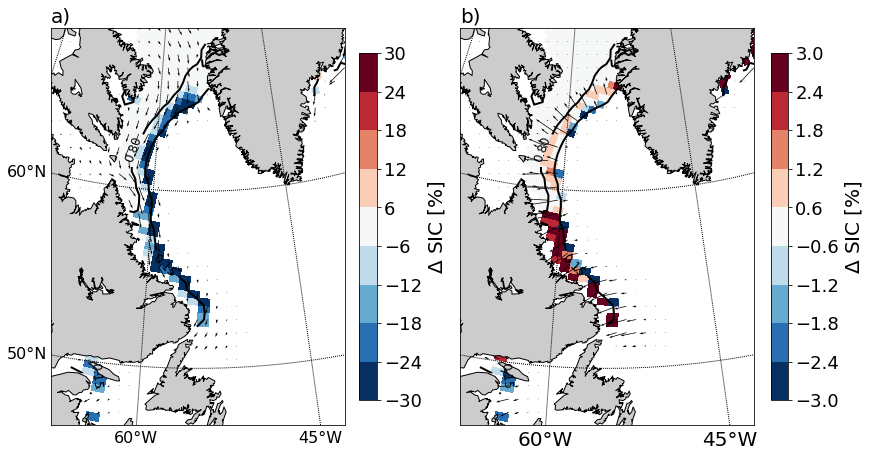

In [8]:
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})

cmap=plt.cm.RdBu_r
# norm=mpl.colors.CenteredNorm(cmap.N)
#        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
bounds = [-0.1, -0.08,-0.06, -0.04,-0.02, 0.02,0.04,0.06,0.08,0.1]
#     v_lim = max([abs(variable.max()),abs(variable.min())])
    # print(variable.max())
#     if var == 'aice':
#         #cmap=cmo.crop(cmap,vmax=0.012,vmin=-0.012,pivot=0, N=13, dmax=0.012)
# #         bounds = [-0.12,-0.1,-0.08,-0.06,-0.04,-0.02, 0.02,0.04,0.06, 0.08,0.1,0.12]
# #         bounds = [x*0.2 for x in bounds]

bounds_therm = [x*3*100 for x in bounds]
norm_therm = mpl.colors.BoundaryNorm(bounds_therm, cmap.N)

bounds_dyn = [x*0.3*100 for x in bounds]
norm_dyn = mpl.colors.BoundaryNorm(bounds_dyn, cmap.N)
            
nlon=384
nlat=320

REP_nwrs='/aos/home/bward/wim/post-proc/case84/avg/'
REP_cpl='/aos/home/bward/wim/post-proc/case83/avg/'
REP_ncpl='/aos/home/bward/wim/post-proc/case85/avg/'

rep_interp='/aos/home/bward/wim/post-proc/case83'

list_month=[3]
list_day=[1]
col=0
m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
            lat_ts=50,lat_0=58,lon_0=-55.)
for mm in list_month:
    for dd in list_day:
        if mm != 12:
            nameFile='iceh_avg.2018'+str(mm).zfill(2)+str(dd).zfill(2)+'00000-2018'+str(mm+1).zfill(2)+str(dd).zfill(2)+'00000.nc'
        else:
            nameFile='iceh_avg.2018'+str(mm).zfill(2)+str(dd).zfill(2)+'00000-201901'+str(dd).zfill(2)+'00000.nc'            
        file_cpl=REP_cpl+nameFile
        file_ncpl=REP_ncpl+nameFile
        file_nwrs=REP_nwrs+nameFile
        
        dx_cpl = xr.open_dataset(file_cpl)
        dx_ncpl = xr.open_dataset(file_ncpl)
        dx_nwrs = xr.open_dataset(file_nwrs)
        
        lat=dx_cpl.TLAT
        lon=dx_cpl.TLON

        sic_cpl=np.squeeze(dx_cpl.aice)
        hs_cpl=np.squeeze(dx_cpl.hs)
        sic_ncpl=np.squeeze(dx_ncpl.aice)
        sic_nwrs=np.squeeze(dx_nwrs.aice)
        
        
        maskNH=sic_cpl.where(lat>=45)
        maskNH=maskNH.where(lat<=72)
        maskNH=maskNH.where(lon>=360-65)
        maskNH=maskNH.where(lat<=360-43)
#         maskMIZ=maskNH
        maskMIZ=maskNH.where(maskNH>=0.15)
#         fsd_cp=np.squeeze(dx_coup.fsdrad).where(aice>0.15)
#         wave_frac=np.squeeze(dx_coup.dafsd_wave[:,0,:,:])

#         maskMIZ=aice.where(lat>0)
#         maskMIZ=maskMIZ.where(aice>0.15)
#         maskfrac=maskMIZ.where(wave_frac>0)
#         maskFSD=maskMIZ.where(fsd_climo<=300)
#         maskMIZ=maskMIZ.where(maskMIZ<=0.8)

#         mask_array_1 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values < 0.15)
#         mask_array_3 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values > 0.8)
#         mask_array_4 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values > 0.8)
#         mask_array_2 = np.logical_or(avg_fsd_obs.values>300, avg_fsd_obs.values==300)

#         fsd_obs_m=ma.masked_array(avg_fsd_obs, mask=mask_array_1)
#         fsd_obs_m2=ma.masked_array(avg_fsd_obs, mask=mask_array_1+mask_array_4)
#         maskMIZ_obs=ma.masked_array(avg_aice_obs, mask=mask_array_1+mask_array_3)
#         test=ma.masked_array(avg_aice_obs, mask=mask_array_1)

#         maskMIZ_fsd_obs=ma.masked_array(avg_fsd_obs, mask=mask_array_1+mask_array_2+mask_array_4)

#         therm=(sic_cpl.where(maskMIZ>0).values-sic_ncpl.where(maskMIZ>0).values) #/sic_cpl.where(maskMIZ>0).values)*100
#         dyn=(sic_cpl.where(maskMIZ>0).values-sic_nwrs.where(maskMIZ>0).values) #/sic_cpl.where(maskMIZ>0).values)*100
        therm=((sic_cpl.values-sic_ncpl.values)/sic_cpl.where(maskMIZ>0).values)*100
        dyn=((sic_cpl.values-sic_nwrs.values)/sic_cpl.where(maskMIZ>0).values)*100    
        uvel_cpl=np.squeeze(dx_cpl.uvel).values
        vvel_cpl=np.squeeze(dx_cpl.vvel).values

        uvel_ncpl=np.squeeze(dx_ncpl.uvel).values
        vvel_ncpl=np.squeeze(dx_ncpl.vvel).values
        
        uvel_nwrs=np.squeeze(dx_nwrs.uvel).values
        vvel_nwrs=np.squeeze(dx_nwrs.vvel).values
        
        test_x=np.squeeze(dx_cpl.strwvx).values
        test_y=np.squeeze(dx_cpl.strwvy).values
        strxproj, stryproj, xwind, ywind=create_wind_projection(test_x, test_y, REP_cpl, nameFile, rep_interp, m, nlon, nlat)

        
        uproj, vproj, xwind, ywind=create_wind_projection(uvel_cpl, vvel_cpl, REP_cpl, nameFile, rep_interp, m, nlon, nlat)
        uproj_nwrs, vproj_nwrs, xwind, ywind=create_wind_projection(uvel_nwrs, vvel_nwrs, REP_nwrs, nameFile, rep_interp, m, nlon, nlat)
        uproj_ncpl, vproj_ncpl, xwind, ywind=create_wind_projection(uvel_ncpl, vvel_ncpl, REP_nwrs, nameFile, rep_interp, m, nlon, nlat)

        norm_cpl=np.sqrt(uproj**2+vproj**2)
        mask=np.logical_or(norm_cpl<0, norm_cpl==0)
        uprojM=ma.masked_array(uproj, mask=mask)
        vprojM=ma.masked_array(vproj, mask=mask)
        
        norm_nwrs=np.sqrt(uproj_nwrs**2+vproj_nwrs**2)
        mask_nwrs=np.logical_or(norm_nwrs<0, norm_nwrs==0)
        uprojM_nwrs=ma.masked_array(uproj_nwrs, mask=mask_nwrs)
        vprojM_nwrs=ma.masked_array(vproj_nwrs, mask=mask_nwrs)
        
        strxM=ma.masked_array(strxproj, mask=mask_nwrs)
        stryM=ma.masked_array(stryproj, mask=mask_nwrs)
        
        anom_u=uproj-uprojM_nwrs
        anom_v=vproj-vprojM_nwrs
        
        anom_u_ncpl=uprojM-uproj_ncpl
        anom_v_ncpl=vprojM-vproj_ncpl
#         dataVecX1,dataVecY1=readVectorCICEWW3(REP_IN_CICE_a, fileCI_a, t_lat, vectorVar)
#         uproj1, vproj1, xwind1, ywind1=create_wind_projection(dataVecX1, dataVecY1, REP_IN_CICE_a, fileCI_a, REP_INTERP, m, nlon, nlat)
#         uprojA = uproj-uproj1
#         vprojA = vproj-vproj1
        
        fig, axes = plt.subplots(1,2,figsize=[12,7.5], constrained_layout=True)

        plt.sca(axes[0])
        # m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
        x,y = m(lon.values, lat.values)
        sc = m.pcolor(x, y, therm, norm=norm_therm, cmap=cmap)
#         m.contour(x,y, hs_cpl.values, linewidths=2)
        cont=m.contour(x,y, sic_cpl.values, colors='k', levels=[0.15, 0.8], linewidths=2)
        if(len(cont.allsegs) != 1):
            axes[0].clabel(cont, fontsize= 12)
            
        m.quiver(xwind, ywind, uprojM, vprojM)

        #, norm=norm, cmap=cmap
        none_map = ListedColormap(['none'])
#         cont2=m.contour(x,y, aice.values, colors='b', levels=[0.8], linewidths=2)
#         cont=m.pcolor(x,y, maskMIZ, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=2)
    #     test=m.pcolor(x,y, maskFSD, color='tab:green')
    #     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
#         cont2=m.contour(x,y, fsd_climo.values, colors='r', levels=[300], linewidths=3)
#         cont=m.pcolor(x,y, maskFSD, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.01, zorder=1)
    #     cont=m.pcolor(x,y, maskfrac, cmap=none_map, hatch='\\ \\ \\', edgecolor='tab:orange', linewidth=0.01, zorder=1)

        m.fillcontinents()
        m.drawcoastlines()
    #    axes.fill_between(cont,cont2, color="none", hatch="X", edgecolor="b", linewidth=0.0)
    #     if(len(cont.allsegs) != 1):
    #         axes.clabel(cont, fontsize= 12)
        # if(len(cont.allsegs) != 1):
        #     axes.clabel(cont, fontsize= 12) 
        m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0], size=16) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=16) # draw meridians

        plt.sca(axes[1])
        # m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
        sc_obs = m.pcolor(x, y, dyn, norm=norm_dyn, cmap=cmap)
        cont=m.contour(x,y, sic_cpl.values, colors='k', levels=[0.15, 0.8], linewidths=2)
        if(len(cont.allsegs) != 1):
            axes[1].clabel(cont, fontsize= 12)
        #, norm=norm, cmap=cmap)
#         m.quiver(xwind, ywind, anom_u, anom_v)
        m.quiver(xwind, ywind, strxM, stryM)
        none_map = ListedColormap(['none'])
#         cont2=m.contour(x_obs,y_obs,test, colors='b', levels=[0.8], linewidths=2)
#         cont=m.pcolor(x_obs,y_obs, maskMIZ_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=1)
    #     test=m.pcolor(x,y, maskFSD, color='tab:green')
    #     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
#         cont2=m.contour(x_obs,y_obs, fsd_obs_m2 , colors='r', levels=[300], linewidths=3)
#         cont=m.pcolor(x_obs,y_obs, maskMIZ_fsd_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.03, zorder=2)

        m.fillcontinents()
        m.drawcoastlines()
    #    axes.fill_between(cont,cont2, color="none", hatch="X", edgecolor="b", linewidth=0.0)
    #     if(len(cont.allsegs) != 1):
    #         axes.clabel(cont, fontsize= 12)
        # if(len(cont.allsegs) != 1):
        #     axes.clabel(cont, fontsize= 12) 
        m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20) # draw meridians
        cb=plt.colorbar(sc, ax=axes[0], shrink=0.65)
        cb.ax.tick_params(labelsize=18)
        cb.ax.tick_params(labelsize=18)
        cb.set_label('$\Delta $ SIC [%]', size=20)
        cb=plt.colorbar(sc_obs, ax=axes[1], shrink=0.65)
        cb.ax.tick_params(labelsize=18)
        cb.ax.tick_params(labelsize=18)
        cb.set_label('$\Delta $ SIC [%]', size=20)
        axes[0].set_title('a)', loc='left', fontsize=20)
        axes[1].set_title('b)', loc='left', fontsize=20)
#     plt.subplots_adjust(wspace=0.4, hspace=0)
#     plt.tight_layout()

# cb=add_colorbar_outside(sc, axes[0], axes[0])
# cb.ax.tick_params(labelsize=18)
# cb.ax.tick_params(labelsize=18)
# cb.set_label('Mean floe diameter model [m]', size=20)

# cb=add_colorbar_outside(sc_obs, axes[1], axes[1])
# cb.ax.tick_params(labelsize=18)
# cb.ax.tick_params(labelsize=18)
# cb.set_label('Mean floe diameter obs [m]', size=20)

# plt.savefig('labrador_floesize_MIZ_march.png',dpi='figure',format='png',metadata=None)

plt.savefig('anom_therm_dyn_labrador_march2018.png',dpi='figure',format='png',metadata=None)

Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
Warning (cdfInqContents): Coordinates variable NFSD can't be assigned!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latg!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latm!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_newi!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_wave!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_weld!
Warning (cdfScanVarAttr): NetCDF: Variable not found - time_bounds
Warning (cdfInqContents): Coordinates variable NFSD can't be assigned!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latg!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_latm!
Warning (cdfVerifyVars): Inconsistent number of dimensions, skipped variable dafsd_newi!
Warning (cdf

/tmp/ipykernel_368311/2315632377.py:144: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc = m.pcolor(x, y, fsd*100, norm=norm_fsd, cmap=cmap)
/tmp/ipykernel_368311/2315632377.py:203: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  sc_therm = m.pcolor(x, y,therm*100, norm=norm_therm, cmap=cmap)


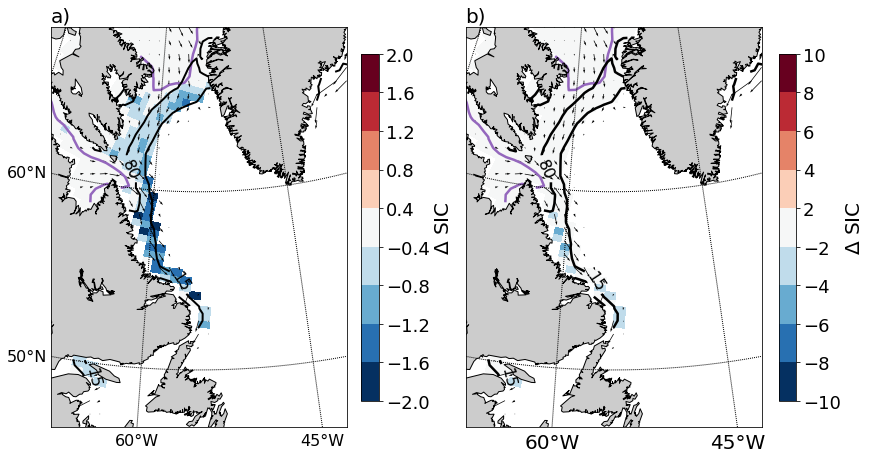

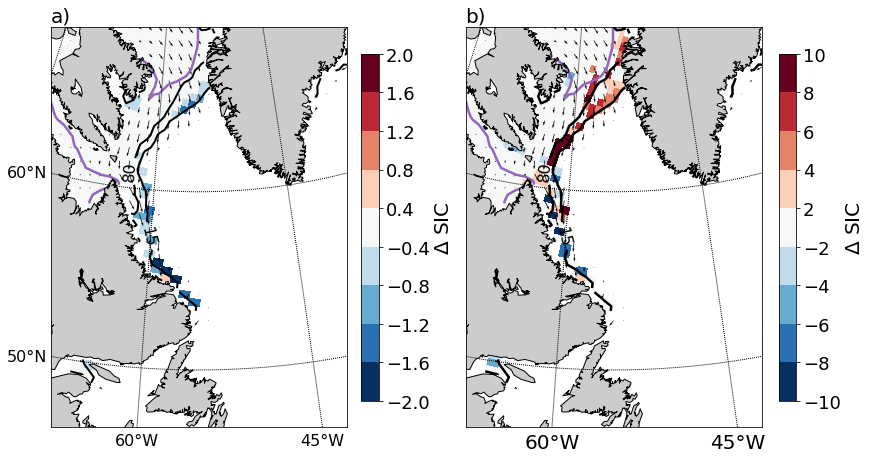

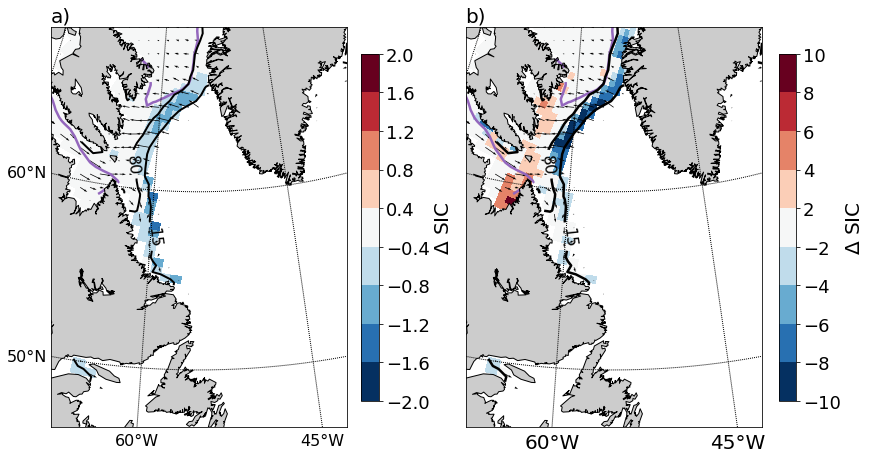

In [27]:
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': True})
import math
cmap=plt.cm.RdBu_r
# norm=mpl.colors.CenteredNorm(cmap.N)
#        bounds = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30]
bounds = [-0.1, -0.08,-0.06, -0.04,-0.02, 0.02,0.04,0.06,0.08,0.1]
#     v_lim = max([abs(variable.max()),abs(variable.min())])
    # print(variable.max())
#     if var == 'aice':
#         #cmap=cmo.crop(cmap,vmax=0.012,vmin=-0.012,pivot=0, N=13, dmax=0.012)
# #         bounds = [-0.12,-0.1,-0.08,-0.06,-0.04,-0.02, 0.02,0.04,0.06, 0.08,0.1,0.12]
# #         bounds = [x*0.2 for x in bounds]

bounds_fsd= [x*0.2*100 for x in bounds]
norm_fsd = mpl.colors.BoundaryNorm(bounds_fsd, cmap.N)

bounds_dyn = [x*0.05*100 for x in bounds]
norm_dyn = mpl.colors.BoundaryNorm(bounds_dyn, cmap.N)

bounds_therm = [x*1*100 for x in bounds]
norm_therm = mpl.colors.BoundaryNorm(bounds_therm, cmap.N)
            
nlon=384
nlat=320

REP_nwrs='/aos/home/bward/wim/cice/out/case94/history/'
REP_cpl='/aos/home/bward/wim/cice/out/case91/history/'
REP_ncpl='/aos/home/bward/wim/cice/out/case92/history/'
REP_ntherm='/aos/home/bward/wim/cice/out/case93/history/'

rep_interp='/aos/home/bward/wim/post-proc/case83'

list_month=[3]
list_day=[13,19,31]
col=0
m = Basemap(width=1850000,height=2500000, resolution='l',projection='stere',\
            lat_ts=50,lat_0=58,lon_0=-55.)
for mm in list_month:
    for dd in list_day:
        if mm != 12:
            nameFile='iceh_avg.2018-'+str(mm).zfill(2)+'-'+str(dd).zfill(2)+'.nc'
        else:
            nameFile='iceh_avg.2018-'+str(mm).zfill(2)+'-'+str(dd).zfill(2)+'.nc'    
        file_cpl=REP_cpl+nameFile
        file_ncpl=REP_ncpl+nameFile
        file_nwrs=REP_nwrs+nameFile
        file_ntherm=REP_ntherm+nameFile
        
        dx_cpl = xr.open_dataset(file_cpl)
        dx_ncpl = xr.open_dataset(file_ncpl)
        dx_nwrs = xr.open_dataset(file_nwrs)
        dx_ntherm = xr.open_dataset(file_ntherm)
        
        lat=dx_cpl.TLAT
        lon=dx_cpl.TLON

        sic_cpl=np.squeeze(dx_cpl.aice)
        fsd_cpl=np.squeeze(dx_cpl.fsdrad)
        hs_cpl=np.squeeze(dx_cpl.hs)
        sic_ncpl=np.squeeze(dx_ncpl.aice)
        sic_nwrs=np.squeeze(dx_nwrs.aice)
        sic_ntherm=np.squeeze(dx_ntherm.aice)
        
        maskNH=sic_cpl.where(lat>=45)
        maskNH=maskNH.where(lat<=72)
        maskNH=maskNH.where(lon>=360-75)
        maskNH=maskNH.where(lon<=360-40)
#         maskMIZ=maskNH
        maskMIZ=maskNH.where(sic_cpl>=0.15)
#         maskMIZ=maskMIZ.where(sic_cpl<=0.8)
#         fsd_cp=np.squeeze(dx_coup.fsdrad).where(aice>0.15)
#         wave_frac=np.squeeze(dx_coup.dafsd_wave[:,0,:,:])

#         maskMIZ=aice.where(lat>0)
#         maskMIZ=maskMIZ.where(aice>0.15)
#         maskfrac=maskMIZ.where(wave_frac>0)
#         maskFSD=maskMIZ.where(fsd_climo<=300)
#         maskMIZ=maskMIZ.where(maskMIZ<=0.8)

#         mask_array_1 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values < 0.15)
#         mask_array_3 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values > 0.8)
#         mask_array_4 = np.logical_or(avg_aice_obs.values > 1, avg_aice_obs.values > 0.8)
#         mask_array_2 = np.logical_or(avg_fsd_obs.values>300, avg_fsd_obs.values==300)

#         fsd_obs_m=ma.masked_array(avg_fsd_obs, mask=mask_array_1)
#         fsd_obs_m2=ma.masked_array(avg_fsd_obs, mask=mask_array_1+mask_array_4)
#         maskMIZ_obs=ma.masked_array(avg_aice_obs, mask=mask_array_1+mask_array_3)
#         test=ma.masked_array(avg_aice_obs, mask=mask_array_1)

#         maskMIZ_fsd_obs=ma.masked_array(avg_fsd_obs, mask=mask_array_1+mask_array_2+mask_array_4)

#         therm=(sic_cpl.where(maskMIZ>0).values-sic_ncpl.where(maskMIZ>0).values) #/sic_cpl.where(maskMIZ>0).values)*100
#         dyn=(sic_cpl.where(maskMIZ>0).values-sic_nwrs.where(maskMIZ>0).values) #/sic_cpl.where(maskMIZ>0).values)*100
        fsd=(sic_cpl.where(maskMIZ>0).values-sic_ncpl.where(maskMIZ>0).values)
        dyn=(sic_cpl.where(maskMIZ>0).values-sic_nwrs.where(maskMIZ>0).values)
        therm=(sic_cpl.where(maskMIZ>0).values-sic_ntherm.where(maskMIZ>0).values)
        
        uvel_cpl=np.squeeze(dx_cpl.uvel).values
        vvel_cpl=np.squeeze(dx_cpl.vvel).values

        uvel_ncpl=np.squeeze(dx_ncpl.uvel).values
        vvel_ncpl=np.squeeze(dx_ncpl.vvel).values
        
        uvel_nwrs=np.squeeze(dx_nwrs.uvel).values
        vvel_nwrs=np.squeeze(dx_nwrs.vvel).values
        
        test_x=np.squeeze(dx_cpl.strwvx).values
        test_y=np.squeeze(dx_cpl.strwvy).values
        strxproj, stryproj, xwind, ywind=create_wind_projection(test_x, test_y, REP_cpl, nameFile, rep_interp, m, nlon, nlat)

        
        uproj, vproj, xwind, ywind=create_wind_projection(uvel_cpl, vvel_cpl, REP_cpl, nameFile, rep_interp, m, nlon, nlat)
        uproj_nwrs, vproj_nwrs, xwind, ywind=create_wind_projection(uvel_nwrs, vvel_nwrs, REP_nwrs, nameFile, rep_interp, m, nlon, nlat)
        uproj_ncpl, vproj_ncpl, xwind, ywind=create_wind_projection(uvel_ncpl, vvel_ncpl, REP_nwrs, nameFile, rep_interp, m, nlon, nlat)

        norm_cpl=np.sqrt(uproj**2+vproj**2)
        mask=np.logical_or(norm_cpl<0, norm_cpl==0)
        uprojM=ma.masked_array(uproj, mask=mask)
        vprojM=ma.masked_array(vproj, mask=mask)
        
        norm_nwrs=np.sqrt(uproj_nwrs**2+vproj_nwrs**2)
        mask_nwrs=np.logical_or(norm_nwrs<0, norm_nwrs==0)
        uprojM_nwrs=ma.masked_array(uproj_nwrs, mask=mask_nwrs)
        vprojM_nwrs=ma.masked_array(vproj_nwrs, mask=mask_nwrs)
        
        strxM=ma.masked_array(strxproj, mask=mask_nwrs)
        stryM=ma.masked_array(stryproj, mask=mask_nwrs)
        
        anom_u=uproj-uprojM_nwrs
        anom_v=vproj-vprojM_nwrs
        
        anom_u_ncpl=uprojM-uproj_ncpl
        anom_v_ncpl=vprojM-vproj_ncpl
#         dataVecX1,dataVecY1=readVectorCICEWW3(REP_IN_CICE_a, fileCI_a, t_lat, vectorVar)
#         uproj1, vproj1, xwind1, ywind1=create_wind_projection(dataVecX1, dataVecY1, REP_IN_CICE_a, fileCI_a, REP_INTERP, m, nlon, nlat)
#         uprojA = uproj-uproj1
#         vprojA = vproj-vproj1
        
        fig, axes = plt.subplots(1,2,figsize=[12,7.5], constrained_layout=True)
        plt.sca(axes[0])
        # m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
        x,y = m(lon.values, lat.values)
        sc = m.pcolor(x, y, fsd*100, norm=norm_fsd, cmap=cmap)
#         m.contour(x,y, hs_cpl.values, linewidths=2)
        cont=m.contour(x,y, fsd_cpl.where(maskMIZ>0).values, colors='tab:purple', levels=[300], linewidths=2.5)
        cont=m.contour(x,y, sic_cpl.values*100, colors='k', levels=[15, 80], linewidths=2)

        if(len(cont.allsegs) != 1):
            axes[0].clabel(cont, fontsize= 16)
            
        m.quiver(xwind, ywind, uprojM, vprojM)

        #, norm=norm, cmap=cmap
        none_map = ListedColormap(['none'])
#         cont2=m.contour(x,y, aice.values, colors='b', levels=[0.8], linewidths=2)
#         cont=m.pcolor(x,y, maskMIZ, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=2)
    #     test=m.pcolor(x,y, maskFSD, color='tab:green')
    #     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
#         cont2=m.contour(x,y, fsd_climo.values, colors='r', levels=[300], linewidths=3)
#         cont=m.pcolor(x,y, maskFSD, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.01, zorder=1)
    #     cont=m.pcolor(x,y, maskfrac, cmap=none_map, hatch='\\ \\ \\', edgecolor='tab:orange', linewidth=0.01, zorder=1)

        m.fillcontinents()
        m.drawcoastlines()
    #    axes.fill_between(cont,cont2, color="none", hatch="X", edgecolor="b", linewidth=0.0)
    #     if(len(cont.allsegs) != 1):
    #         axes.clabel(cont, fontsize= 12)
        # if(len(cont.allsegs) != 1):
        #     axes.clabel(cont, fontsize= 12) 
        m.drawparallels(np.arange(-90.,120.,10.),labels=[1,0,0,0], size=16) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=16) # draw meridians

#         plt.sca(axes[1])
#         # m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
#         sc_obs = m.pcolor(x, y, dyn*100, norm=norm_dyn, cmap=cmap)
#         cont=m.contour(x,y, sic_cpl.values, colors='k', levels=[0.15, 0.8], linewidths=2)
#         if(len(cont.allsegs) != 1):
#             axes[1].clabel(cont, fontsize= 12)
#         #, norm=norm, cmap=cmap)
# #         m.quiver(xwind, ywind, anom_u, anom_v)
#         m.quiver(xwind, ywind, strxM, stryM)
#         none_map = ListedColormap(['none'])
# #         cont2=m.contour(x_obs,y_obs,test, colors='b', levels=[0.8], linewidths=2)
# #         cont=m.pcolor(x_obs,y_obs, maskMIZ_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=1)
#     #     test=m.pcolor(x,y, maskFSD, color='tab:green')
#     #     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
# #         cont2=m.contour(x_obs,y_obs, fsd_obs_m2 , colors='r', levels=[300], linewidths=3)
# #         cont=m.pcolor(x_obs,y_obs, maskMIZ_fsd_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.03, zorder=2)

#         m.fillcontinents()
#         m.drawcoastlines()
#     #    axes.fill_between(cont,cont2, color="none", hatch="X", edgecolor="b", linewidth=0.0)
#     #     if(len(cont.allsegs) != 1):
#     #         axes.clabel(cont, fontsize= 12)
#         # if(len(cont.allsegs) != 1):
#         #     axes.clabel(cont, fontsize= 12) 
#         m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
#         m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20) # draw meridians
        
        plt.sca(axes[1])
        # m = Basemap(width=1850000,height=1600000, resolution='l',projection='stere',lat_ts=50,lat_0=53,lon_0=-55.)
        sc_therm = m.pcolor(x, y,therm*100, norm=norm_therm, cmap=cmap)
        cont=m.contour(x,y, fsd_cpl.where(maskMIZ>0).values, colors='tab:purple', levels=[300], linewidths=2.5)
        cont=m.contour(x,y, sic_cpl.values*100, colors='k', levels=[15, 80], linewidths=2.5)
        if(len(cont.allsegs) != 1):
            axes[1].clabel(cont, fontsize= 16)
        #, norm=norm, cmap=cmap)
#         m.quiver(xwind, ywind, anom_u, anom_v)
#         m.quiver(xwind, ywind, strxM, stryM)
        none_map = ListedColormap(['none'])
        m.quiver(xwind, ywind, uprojM, vprojM)
#         cont2=m.contour(x_obs,y_obs,test, colors='b', levels=[0.8], linewidths=2)
#         cont=m.pcolor(x_obs,y_obs, maskMIZ_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='b', linewidth=0.01, zorder=1)
    #     test=m.pcolor(x,y, maskFSD, color='tab:green')
    #     test=m.pcolor(x,y, maskMIZ, color='tab:cyan')
#         cont2=m.contour(x_obs,y_obs, fsd_obs_m2 , colors='r', levels=[300], linewidths=3)
#         cont=m.pcolor(x_obs,y_obs, maskMIZ_fsd_obs, cmap=none_map, hatch='\\ \\ \\', edgecolor='r', linewidth=0.03, zorder=2)

        m.fillcontinents()
        m.drawcoastlines()
    #    axes.fill_between(cont,cont2, color="none", hatch="X", edgecolor="b", linewidth=0.0)
    #     if(len(cont.allsegs) != 1):
    #         axes.clabel(cont, fontsize= 12)
        # if(len(cont.allsegs) != 1):
        #     axes.clabel(cont, fontsize= 12) 
        m.drawparallels(np.arange(-90.,120.,10.),labels=[0,0,0,0], size=20) # draw parallels
        m.drawmeridians(np.arange(0.,420.,15.),labels=[0,0,0,1], size=20) # draw meridians
        cb=plt.colorbar(sc, ax=axes[0], shrink=0.65)
        cb.ax.tick_params(labelsize=18)
        cb.ax.tick_params(labelsize=18)
        cb.set_label('$\Delta $ SIC', size=20)
        cb=plt.colorbar(sc_therm, ax=axes[1], shrink=0.65)
        cb.ax.tick_params(labelsize=18)
        cb.ax.tick_params(labelsize=18)
        cb.set_label('$\Delta $ SIC', size=20)
#         cb=plt.colorbar(sc_therm, ax=axes[2], shrink=0.35)
#         cb.ax.tick_params(labelsize=18)
#         cb.ax.tick_params(labelsize=18)
#         cb.set_label('$\Delta $ SIC', size=20)
        axes[0].set_title('a)', loc='left', fontsize=20)
        axes[1].set_title('b)', loc='left', fontsize=20)
        plt.savefig('anom_nfsd_ntherm_labrador_march'+str(dd).zfill(2)+'.png',dpi='figure',format='png',metadata=None)
#         axes[2].set_title('c)', loc='left', fontsize=20)
#     plt.subplots_adjust(wspace=0.4, hspace=0)
#     plt.tight_layout()
